 # Load Necessary Libraries:-

In [1]:

import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as s
import joblib

# Load Kaggle Dataset:- 

In [188]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
# size of dataset:- 
loan_df.shape,loan_df.size

((45000, 14), 630000)

In [4]:
loan_df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
loan_df.isnull().sum()/loan_df.shape[0] * 100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

# Info About the DataSet:-

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [10]:
loan_df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [100]:
plt.figure(figsize=(5,15))
loan_df.groupby('person_education')['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max     min  median          sum
person_education                                                   
Associate         9627.988942  35000.0   563.0  8000.0  115805451.0
Bachelor          9556.113068  35000.0   500.0  8000.0  128042359.0
Doctorate         9930.932367  35000.0  1000.0  8400.0    6167109.0
High School       9543.422987  35000.0   500.0  8000.0  114253860.0
Master            9595.030229  35000.0   500.0  8000.0   66973311.0

<Figure size 500x1500 with 0 Axes>

In [102]:
plt.figure(figsize=(5,15))
loan_df.groupby('person_home_ownership')['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max     min   median          sum
person_home_ownership                                                     
MORTGAGE               10716.832225  35000.0   500.0   9600.0  198143511.0
OTHER                  11282.324786  25000.0  1000.0  10000.0    1320032.0
OWN                     8980.320230  35000.0   563.0   7500.0   26500925.0
RENT                    8756.457023  35000.0   500.0   7500.0  205277622.0

<Figure size 500x1500 with 0 Axes>

In [101]:
plt.figure(figsize=(5,15))
loan_df.groupby('loan_intent')['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max    min  median         sum
loan_intent                                                        
DEBTCONSOLIDATION   9548.333660  35000.0  500.0  8000.0  68222844.0
EDUCATION           9507.405987  35000.0  700.0  8000.0  87021287.0
HOMEIMPROVEMENT    10419.187330  35000.0  500.0  9000.0  49834973.0
MEDICAL             9137.959172  35000.0  500.0  7846.0  78111275.0
PERSONAL            9603.918432  35000.0  500.0  8000.0  72528792.0
VENTURE             9658.897429  35000.0  563.0  8000.0  75522919.0

<Figure size 500x1500 with 0 Axes>

In [98]:
plt.figure(figsize=(5,15))
loan_df.groupby('person_age')['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max      min   median         sum
person_age                                                     
20.0         8777.941176  24250.0   2000.0   6000.0    149225.0
21.0         7470.461598  30000.0    700.0   6000.0   9629425.0
22.0         8658.176110  35000.0    500.0   7325.0  36676034.0
23.0         9138.893986  35000.0   1000.0   8000.0  48015749.0
24.0         9562.169716  35000.0    922.0   8000.0  49130428.0
25.0         9766.708675  35000.0    750.0   8000.0  44018556.0
26.0         9744.801312  35000.0    500.0   8000.0  35656228.0
27.0         9838.307593  35000.0    725.0   8000.0  30449562.0
28.0        10127.036657  35000.0   1000.0   8821.5  27626556.0
29.0        10015.168635  35000.0   1000.0   8120.0  24587239.0
30.0        10062.890648  35000.0    950.0   8500.0  20337102.0
31.0         9977.419453  35000.0   1000.0   8000.0  16412855.0
32.0         9586.349252  35000.0    563.0   8000.0  13449648.0
33.0         9734.255645  35000.0    500.0   8325.0  12070477.0
34.0        10197.437755  35000.0   1000.0   9000.0   9993489.0
35.0         9768.734357  35000.0   1000.0   8200.0   8274118.0
36.0         9661.708108  35000.0    912.0   8000.0   7149664.0
37.0        10004.644144  35000.0   1000.0   8000.0   6663093.0
38.0         9758.184891  35000.0   1000.0   8250.0   4908367.0
39.0        10048.866324  35000.0   1000.0   8000.0   3909009.0
40.0         9978.785100  35000.0   1000.0   8434.0   3482596.0
41.0        10059.013201  35000.0   1000.0   8000.0   3047881.0
42.0        10915.858300  35000.0   1000.0   9121.0   2696217.0
43.0        10298.972093  30600.0   1000.0   9000.0   2214279.0
44.0         9337.237288  35000.0   1000.0   8000.0   1652691.0
45.0        10317.311111  35000.0   1000.0   9000.0   1392837.0
46.0        10531.526316  30000.0   1000.0  10000.0   1200594.0
47.0         9220.812500  25000.0   1000.0   8000.0   1032731.0
48.0         9579.774194  29700.0   1169.0   8000.0    890919.0
49.0        11006.169492  24000.0   2400.0  12000.0    649364.0
50.0         9995.285714  30000.0   1500.0   8000.0    559736.0
51.0         9932.521739  30000.0   1000.0   8750.0    456896.0
52.0         9315.523810  25000.0   1000.0   8000.0    391252.0
53.0         9666.742857  35000.0   1400.0   7000.0    338336.0
54.0        10437.500000  29850.0   1000.0   9300.0    250500.0
55.0        10016.666667  20000.0   1000.0   9250.0    240400.0
56.0        10405.450000  20000.0   2500.0   9287.5    208109.0
57.0         6708.823529  15000.0   2000.0   5800.0    114050.0
58.0         7820.000000  35000.0   1500.0   5250.0    156400.0
59.0         7276.166667  12000.0   1000.0   7528.5     43657.0
60.0        10653.125000  20000.0   1500.0  10000.0    170450.0
61.0        15298.083333  30000.0   4000.0  10751.0    183577.0
62.0        14610.714286  25000.0   2500.0  16000.0    102275.0
63.0         9658.333333  12025.0   5450.0  11500.0     28975.0
64.0        11114.285714  20000.0   3000.0  10000.0     77800.0
65.0        16927.500000  35000.0   3000.0  11387.5    169275.0
66.0        14291.000000  28000.0   6475.0   8000.0    157201.0
67.0         3000.000000   3000.0   3000.0   3000.0      3000.0
69.0         9510.000000  20000.0   4800.0   6000.0     47550.0
70.0         7657.142857  15000.0   1000.0   7000.0     53600.0
73.0         4866.666667   7800.0   1800.0   5000.0     14600.0
76.0        15000.000000  15000.0  15000.0  15000.0     15000.0
78.0         3000.000000   3000.0   3000.0   3000.0      3000.0
80.0         6800.000000   6800.0   6800.0   6800.0      6800.0
84.0        10000.000000  10000.0  10000.0  10000.0     10000.0
94.0         6500.000000   6500.0   6500.0   6500.0      6500.0
109.0        6195.000000   6195.0   6195.0   6195.0      6195.0
116.0        3823.000000   3823.0   3823.0   3823.0      3823.0
123.0       20200.000000  20400.0  20000.0  20200.0     40400.0
144.0        5266.666667   6000.0   4800.0   5000.0     15800.0

<Figure size 500x1500 with 0 Axes>

In [97]:
pd.pivot_table(loan_df, values='loan_amnt', index=['person_age'], columns=['person_gender'],aggfunc=[np.sum]).fillna(0) # aggfunc=np.sum

C:\Users\DELL\AppData\Local\Temp\ipykernel_21876\329647889.py:1: FutureWarning: The provided callable <function sum at 0x00000166A95C8FE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(loan_df, values='loan_amnt', index=['person_age'], columns=['person_gender'],aggfunc=[np.sum]).fillna(0) # aggfunc=np.sum


sum            
person_gender      female        male
person_age                           
20.0              74750.0     74475.0
21.0            4307905.0   5321520.0
22.0           16303352.0  20372682.0
23.0           20934553.0  27081196.0
24.0           22113894.0  27016534.0
25.0           20019712.0  23998844.0
26.0           15768209.0  19888019.0
27.0           13403884.0  17045678.0
28.0           12542318.0  15084238.0
29.0           11196265.0  13390974.0
30.0            9202720.0  11134382.0
31.0            7857549.0   8555306.0
32.0            5543849.0   7905799.0
33.0            5576731.0   6493746.0
34.0            4534772.0   5458717.0
35.0            3893865.0   4380253.0
36.0            2872880.0   4276784.0
37.0            2927270.0   3735823.0
38.0            2073256.0   2835111.0
39.0            1773523.0   2135486.0
40.0            1687786.0   1794810.0
41.0            1041837.0   2006044.0
42.0            1063373.0   1632844.0
43.0            1041552.0   1172727.0
44.0             647551.0   1005140.0
45.0             549675.0    843162.0
46.0             438186.0    762408.0
47.0             420565.0    612166.0
48.0             309282.0    581637.0
49.0             273688.0    375676.0
50.0             250718.0    309018.0
51.0             157880.0    299016.0
52.0             153421.0    237831.0
53.0              94450.0    243886.0
54.0             104625.0    145875.0
55.0             112500.0    127900.0
56.0              49975.0    158134.0
57.0              19100.0     94950.0
58.0              19500.0    136900.0
59.0               1000.0     42657.0
60.0              13000.0    157450.0
61.0              61000.0    122577.0
62.0              59525.0     42750.0
63.0               5450.0     23525.0
64.0              20000.0     57800.0
65.0              45775.0    123500.0
66.0              68300.0     88901.0
67.0                  0.0      3000.0
69.0               6000.0     41550.0
70.0                  0.0     53600.0
73.0               5000.0      9600.0
76.0              15000.0         0.0
78.0                  0.0      3000.0
80.0                  0.0      6800.0
84.0                  0.0     10000.0
94.0                  0.0      6500.0
109.0                 0.0      6195.0
116.0                 0.0      3823.0
123.0             20400.0     20000.0
144.0              5000.0     10800.0

In [103]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [109]:
plt.figure(figsize=(5,15))
loan_df.groupby(['person_age','person_education'])['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max      min   median  \
person_age person_education                                            
20.0       Associate          6120.000000  12000.0   2000.0   4800.0   
           Bachelor           8000.000000  16000.0   2000.0   6000.0   
           High School        9196.428571  24250.0   2000.0   6500.0   
           Master            15125.000000  24250.0   6000.0  15125.0   
21.0       Associate          7408.979290  28000.0   1000.0   6000.0   
...                                   ...      ...      ...      ...   
116.0      Bachelor           3823.000000   3823.0   3823.0   3823.0   
123.0      Bachelor          20000.000000  20000.0  20000.0  20000.0   
           High School       20400.000000  20400.0  20400.0  20400.0   
144.0      Associate          5500.000000   6000.0   5000.0   5500.0   
           Bachelor           4800.000000   4800.0   4800.0   4800.0   

                                   sum  
person_age person_education             
20.0       Associate           30600.0  
           Bachelor            24000.0  
           High School         64375.0  
           Master              30250.0  
21.0       Associate         2504235.0  
...                                ...  
116.0      Bachelor             3823.0  
123.0      Bachelor            20000.0  
           High School         20400.0  
144.0      Associate           11000.0  
           Bachelor             4800.0  

[235 rows x 5 columns]

<Figure size 500x1500 with 0 Axes>

In [110]:
plt.figure(figsize=(5,15))
loan_df.groupby(['person_age','person_gender','person_education'])['loan_amnt'].agg(['mean','max','min','median','sum'])

mean      max      min  \
person_age person_gender person_education                                   
20.0       female        Associate          9500.000000  12000.0   7000.0   
                         High School        6375.000000  15000.0   2000.0   
                         Master            15125.000000  24250.0   6000.0   
           male          Associate          3866.666667   4800.0   2000.0   
                         Bachelor           8000.000000  16000.0   2000.0   
...                                                 ...      ...      ...   
123.0      female        High School       20400.000000  20400.0  20400.0   
           male          Bachelor          20000.000000  20000.0  20000.0   
144.0      female        Associate          5000.000000   5000.0   5000.0   
           male          Associate          6000.000000   6000.0   6000.0   
                         Bachelor           4800.000000   4800.0   4800.0   

                                            median      sum  
person_age person_gender person_education                    
20.0       female        Associate          9500.0  19000.0  
                         High School        4250.0  25500.0  
                         Master            15125.0  30250.0  
           male          Associate          4800.0  11600.0  
                         Bachelor           6000.0  24000.0  
...                                            ...      ...  
123.0      female        High School       20400.0  20400.0  
           male          Bachelor          20000.0  20000.0  
144.0      female        Associate          5000.0   5000.0  
           male          Associate          6000.0   6000.0  
                         Bachelor           4800.0   4800.0  

[418 rows x 5 columns]

<Figure size 500x1500 with 0 Axes>

In [112]:
plt.figure(figsize=(5,15))
loan_df.groupby(['person_age','person_gender','person_education','person_home_ownership'])['loan_amnt'].agg(['mean','max','min','median','sum'])

mean  \
person_age person_gender person_education person_home_ownership            
20.0       female        Associate        MORTGAGE               12000.0   
                                          RENT                    7000.0   
                         High School      MORTGAGE                8500.0   
                                          OWN                     2000.0   
                                          RENT                    6500.0   
...                                                                  ...   
123.0      female        High School      RENT                   20400.0   
           male          Bachelor         RENT                   20000.0   
144.0      female        Associate        MORTGAGE                5000.0   
           male          Associate        MORTGAGE                6000.0   
                         Bachelor         RENT                    4800.0   

                                                                     max  \
person_age person_gender person_education person_home_ownership            
20.0       female        Associate        MORTGAGE               12000.0   
                                          RENT                    7000.0   
                         High School      MORTGAGE               15000.0   
                                          OWN                     2000.0   
                                          RENT                    6500.0   
...                                                                  ...   
123.0      female        High School      RENT                   20400.0   
           male          Bachelor         RENT                   20000.0   
144.0      female        Associate        MORTGAGE                5000.0   
           male          Associate        MORTGAGE                6000.0   
                         Bachelor         RENT                    4800.0   

                                                                     min  \
person_age person_gender person_education person_home_ownership            
20.0       female        Associate        MORTGAGE               12000.0   
                                          RENT                    7000.0   
                         High School      MORTGAGE                2000.0   
                                          OWN                     2000.0   
                                          RENT                    6500.0   
...                                                                  ...   
123.0      female        High School      RENT                   20400.0   
           male          Bachelor         RENT                   20000.0   
144.0      female        Associate        MORTGAGE                5000.0   
           male          Associate        MORTGAGE                6000.0   
                         Bachelor         RENT                    4800.0   

                                                                  median  \
person_age person_gender person_education person_home_ownership            
20.0       female        Associate        MORTGAGE               12000.0   
                                          RENT                    7000.0   
                         High School      MORTGAGE                8500.0   
                                          OWN                     2000.0   
                                          RENT                    6500.0   
...                                                                  ...   
123.0      female        High School      RENT                   20400.0   
           male          Bachelor         RENT                   20000.0   
144.0      female        Associate        MORTGAGE                5000.0   
           male          Associate        MORTGAGE                6000.0   
                         Bachelor         RENT                    4800.0   

                                                                     sum  
person_age person_gender person_educa

<Figure size 500x1500 with 0 Axes>

In [111]:
plt.figure(figsize=(5,15))
loan_df.groupby(['person_age','person_gender','person_education','person_home_ownership','loan_intent'])['loan_amnt'].agg(['mean','max','min','median','sum'])

mean  \
person_age person_gender person_education person_home_ownership loan_intent                  
20.0       female        Associate        MORTGAGE              DEBTCONSOLIDATION  12000.0   
                                          RENT                  MEDICAL             7000.0   
                         High School      MORTGAGE              VENTURE             8500.0   
                                          OWN                   VENTURE             2000.0   
                                          RENT                  VENTURE             6500.0   
...                                                                                    ...   
123.0      female        High School      RENT                  EDUCATION          20400.0   
           male          Bachelor         RENT                  VENTURE            20000.0   
144.0      female        Associate        MORTGAGE              PERSONAL            5000.0   
           male          Associate        MORTGAGE              EDUCATION           6000.0   
                         Bachelor         RENT                  VENTURE             4800.0   

                                                                                       max  \
person_age person_gender person_education person_home_ownership loan_intent                  
20.0       female        Associate        MORTGAGE              DEBTCONSOLIDATION  12000.0   
                                          RENT                  MEDICAL             7000.0   
                         High School      MORTGAGE              VENTURE            15000.0   
                                          OWN                   VENTURE             2000.0   
                                          RENT                  VENTURE             6500.0   
...                                                                                    ...   
123.0      female        High School      RENT                  EDUCATION          20400.0   
           male          Bachelor         RENT                  VENTURE            20000.0   
144.0      female        Associate        MORTGAGE              PERSONAL            5000.0   
           male          Associate        MORTGAGE              EDUCATION           6000.0   
                         Bachelor         RENT                  VENTURE             4800.0   

                                                                                       min  \
person_age person_gender person_education person_home_ownership loan_intent                  
20.0       female        Associate        MORTGAGE              DEBTCONSOLIDATION  12000.0   
                                          RENT                  MEDICAL             7000.0   
                         High School      MORTGAGE              VENTURE             2000.0   
                                          OWN                   VENTURE             2000.0   
                                          RENT                  VENTURE             6500.0   
...                                                                                    ...   
123.0      female        High School      RENT                  EDUCATION          20400.0   
           male          Bachelor         RENT                  VENTURE            20000.0   
144.0      female        Associate        MORTGAGE              PERSONAL            5000.0   
           male          Associate        MORTGAGE              EDUCATION           6000.0   
                         Bachelor         RENT                  VENTURE             4800.0   

                                                                                    median  \
person_age person_gender person_education person_home_ownership loan_intent                  
20.0       female        Associate        MORTGAGE              DEBTCONSOLIDATION  12000.0   
                                          RENT                  MEDICAL             7000.0   
                         High School     

<Figure size 500x1500 with 0 Axes>

# Analysis of Data and find more useful data from whole dataset:- 

[Text(0, 0, '20159'), Text(0, 0, '24841')]


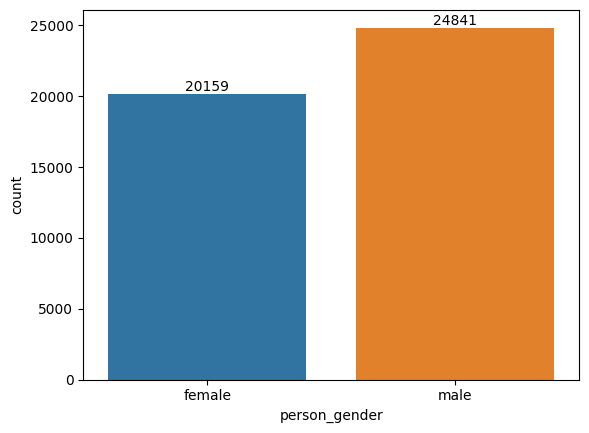

In [26]:
loan_df['person_gender'].value_counts()
data = sns.countplot(x= loan_df['person_gender'])
for i in data.containers:
    print(data.bar_label(i))

[Text(0, 0, '15674'), Text(0, 0, '19326')]
[Text(0, 0, '4485'), Text(0, 0, '5515')]


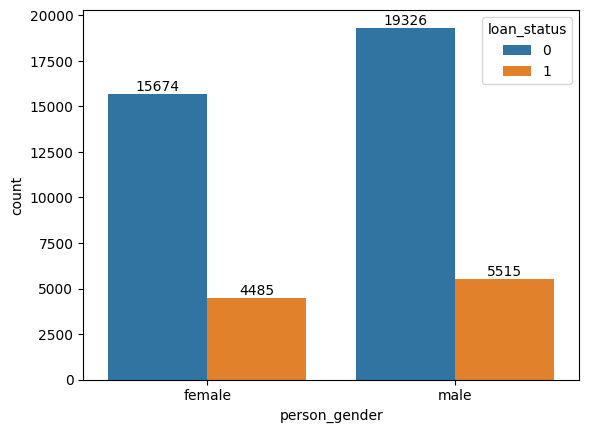

In [11]:
loan_df['person_gender'].value_counts()
data = sns.countplot(x= loan_df['person_gender'],hue=loan_df['loan_status'])
for i in data.containers:
    print(data.bar_label(i))

# # Most Male Candidate apply for Loan and approved its high as compared to female 

# Cleary we see shat male candidate applying loan scroe must better than female

In [17]:
male= loan_df[loan_df['person_gender']=='male'].shape 
female = loan_df[loan_df['person_gender']=='female'].shape

male,female

((24841, 14), (20159, 14))

In [22]:
total = male[0] + female[0]
print(f'Sum of total records:- {total}') 

Sum of total records:- 45000


In [25]:
print(f" Male Percentage :- {(male[0] / total) * 100 }") 

print(f" Female Percentage :- {(female[0] / total) * 100 }") 

 Male Percentage :- 55.20222222222222
 Female Percentage :- 44.797777777777775


In [27]:
loan_df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

[Text(0, 0, '5461'), Text(0, 0, '9301'), Text(0, 0, '10381'), Text(0, 0, '9378'), Text(0, 0, '479')]
[Text(0, 0, '1519'), Text(0, 0, '2671'), Text(0, 0, '3018'), Text(0, 0, '2650'), Text(0, 0, '142')]


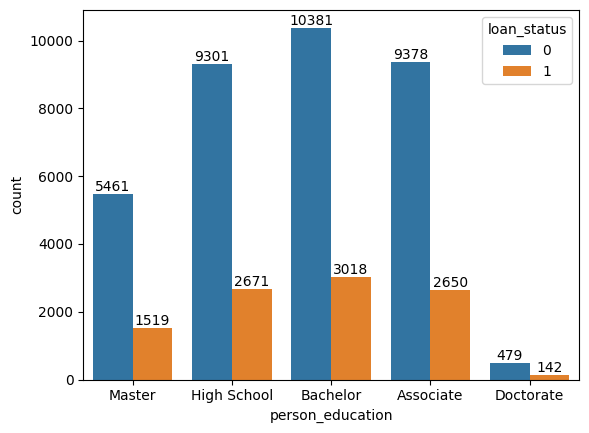

In [29]:
loan_df['person_education'].value_counts()

data = sns.countplot(x= loan_df['person_education'],hue=loan_df['loan_status'])

for i in data.containers:
    print(data.bar_label(i))

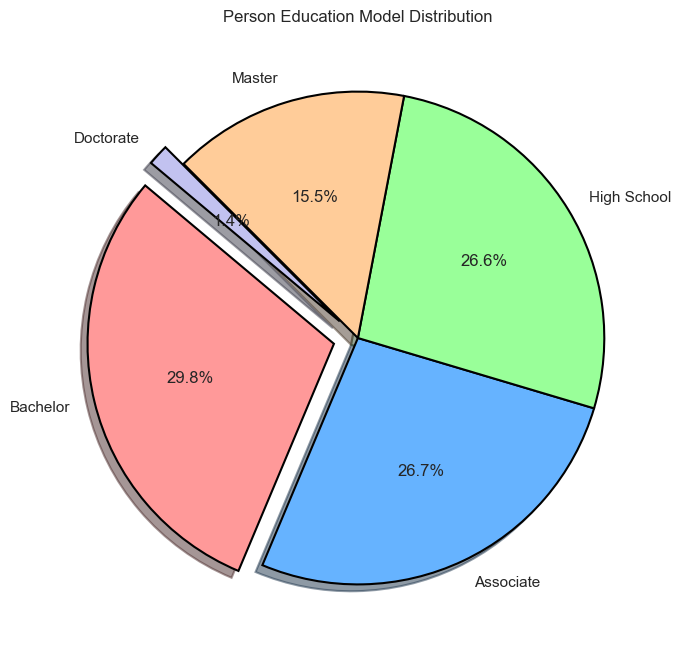

In [134]:
# Count occurrences of each model :-
model_counts = loan_df['person_education'].value_counts()

# Define colors for the pie chart :-
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create pie chart :-
plt.figure(figsize=(8, 8))
plt.pie(
    model_counts, 
    labels=model_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',        # Show percentage on each slice
    startangle=140,           # Start angle for first slice
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Edge color and width
    shadow=True,              # Add shadow for a 3D effect
    explode=(0.1, 0, 0, 0, 0.1)  # Emphasize certain slices
)

# Add title
plt.title('Person Education Model Distribution')

# Display the chart
plt.show()

In [137]:
#loan_df['person_home_ownership'].value_counts()
#loan_df['loan_intent'].value_counts()

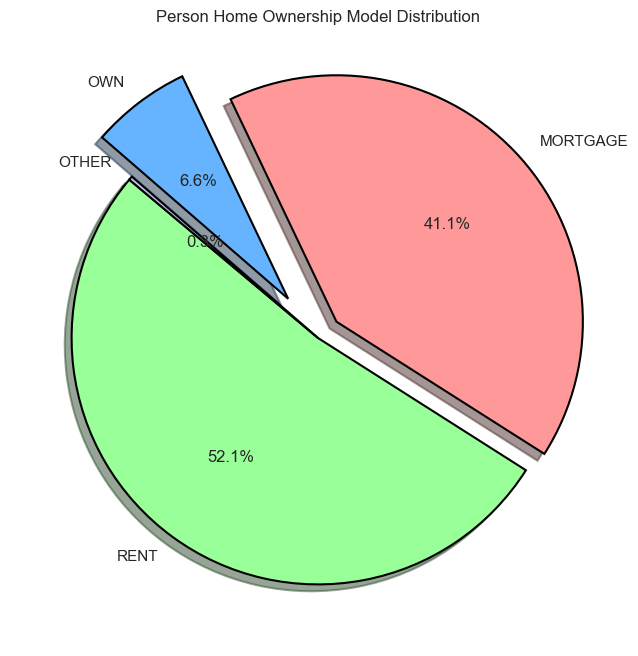

In [135]:
# Count occurrences of each model :-
model_counts = loan_df['person_home_ownership'].value_counts()

# Define colors for the pie chart :-
colors = ['#99ff99','#ff9999','#66b3ff','#c2c2f0']

# Create pie chart :-
plt.figure(figsize=(8, 8))
plt.pie(
    model_counts, 
    labels=model_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',        # Show percentage on each slice
    startangle=140,           # Start angle for first slice
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Edge color and width
    shadow=True,              # Add shadow for a 3D effect
    explode=(0, 0.1, 0.2, 0)  # Emphasize certain slices
)

# Add title
plt.title('Person Home Ownership Model Distribution')

# Display the chart
plt.show()

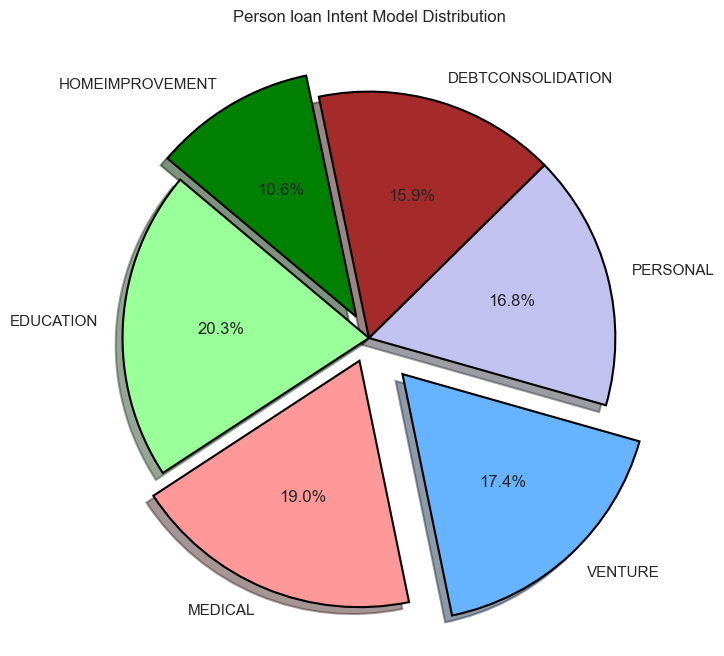

In [144]:
# Count occurrences of each model :-
model_counts = loan_df['loan_intent'].value_counts()

# Define colors for the pie chart :-
colors = ['#99ff99','#ff9999','#66b3ff','#c2c2f0','brown','green']

# Create pie chart :-
plt.figure(figsize=(8, 8))
plt.pie(
    model_counts, 
    labels=model_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',        # Show percentage on each slice
    startangle=140,           # Start angle for first slice
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Edge color and width
    shadow=True,              # Add shadow for a 3D effect
    explode=(0, 0.1, 0.2, 0,0,0.1)  # Emphasize certain slices
)

# Add title
plt.title('Person loan Intent Model Distribution')

# Display the chart
plt.show()

[Text(0, 0, '3160'), Text(0, 0, '5341'), Text(0, 0, '6018'), Text(0, 0, '5365'), Text(0, 0, '275')]
[Text(0, 0, '3820'), Text(0, 0, '6631'), Text(0, 0, '7381'), Text(0, 0, '6663'), Text(0, 0, '346')]


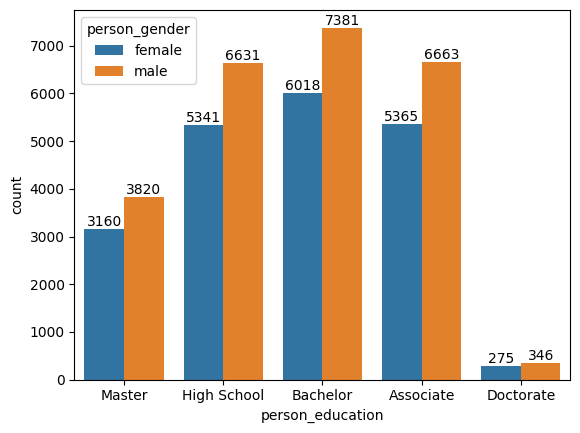

In [31]:
loan_df['person_education'].value_counts()

data = sns.countplot(x= loan_df['person_education'],hue=loan_df['person_gender'])

for i in data.containers:
    print(data.bar_label(i))

# "Among students with a bachelor's degree, a higher proportion of male students apply for loans, and loans are more frequently approved for male students compared to their female counterparts."

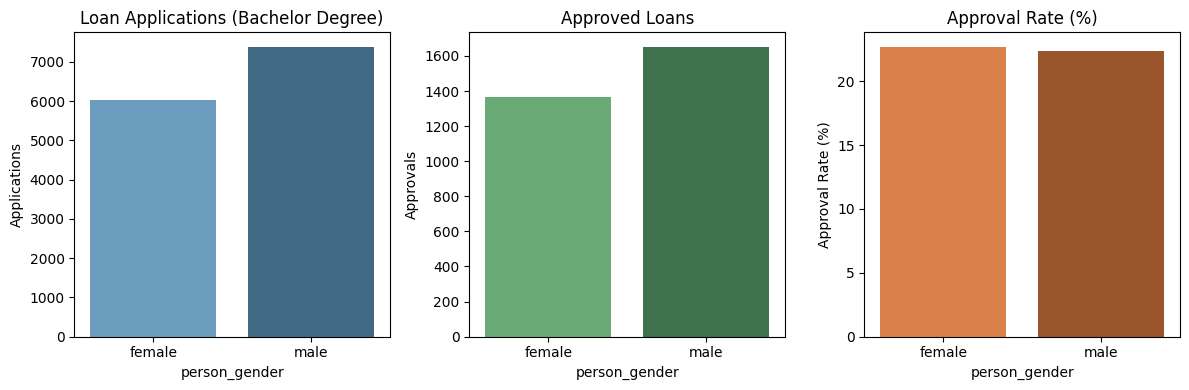

In [46]:
# Filter: Only Bachelor's Degree
bachelor_df = loan_df[loan_df['person_education'] == 'Bachelor']

# Group by Gender
gender_group = bachelor_df.groupby('person_gender')

# Count total applications and approvals
applications = gender_group.size()
approvals = gender_group['loan_status'].sum()  # Assuming 1 = approved

# Create DataFrame for plotting
summary_df = pd.DataFrame({
    'Applications': applications,
    'Approvals': approvals,
    'Approval Rate (%)': (approvals / applications * 100).round(2)
}).reset_index()

# Plot Applications
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(data=summary_df, x='person_gender', y='Applications', palette='Blues_d')
plt.title('Loan Applications (Bachelor Degree)')

# Plot Approvals
plt.subplot(1, 3, 2)
sns.barplot(data=summary_df, x='person_gender', y='Approvals', palette='Greens_d')
plt.title('Approved Loans')

# Plot Approval Rate
plt.subplot(1, 3, 3)
sns.barplot(data=summary_df, x='person_gender', y='Approval Rate (%)', palette='Oranges_d')
plt.title('Approval Rate (%)')

plt.tight_layout()
plt.show()

In [32]:
loan_df['person_emp_exp'].value_counts()

person_emp_exp
0      9566
2      4134
1      4061
3      3890
4      3524
       ... 
101       1
124       1
125       1
121       1
85        1
Name: count, Length: 63, dtype: int64

[Text(0, 0, '10522'), Text(0, 0, '1312'), Text(0, 0, '8275'), Text(0, 0, '50')]
[Text(0, 0, '12921'), Text(0, 0, '1639'), Text(0, 0, '10214'), Text(0, 0, '67')]


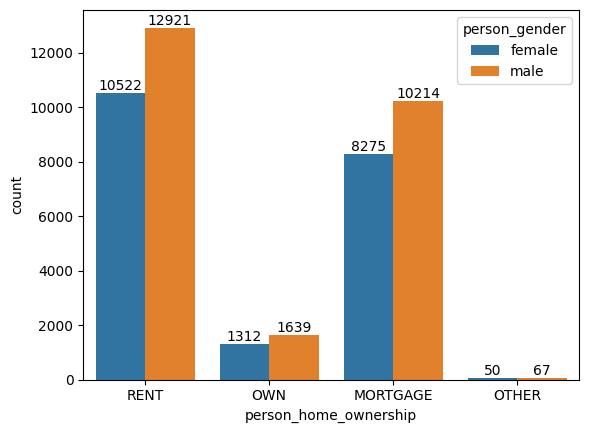

In [33]:
loan_df['person_home_ownership'].value_counts()

data = sns.countplot(x= loan_df['person_home_ownership'],hue=loan_df['person_gender'])

for i in data.containers:
    print(data.bar_label(i))


[Text(0, 0, '15848'), Text(0, 0, '2729'), Text(0, 0, '16345'), Text(0, 0, '78')]
[Text(0, 0, '7595'), Text(0, 0, '222'), Text(0, 0, '2144'), Text(0, 0, '39')]


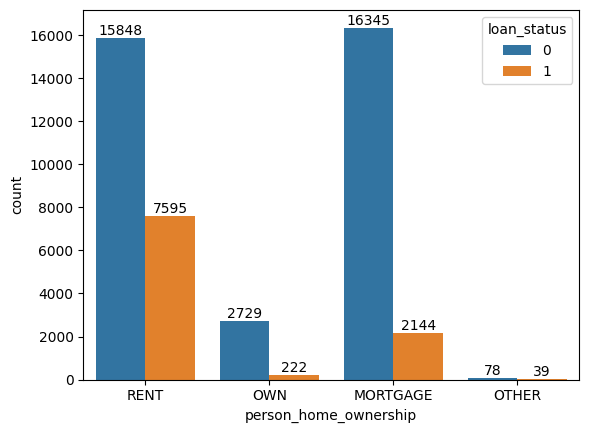

In [34]:
loan_df['person_home_ownership'].value_counts()

data = sns.countplot(x= loan_df['person_home_ownership'],hue=loan_df['loan_status'])

for i in data.containers:
    print(data.bar_label(i))

# Students living in rented or mortgaged accommodations are the most likely to apply for loans. Among these applicants, male students receive the majority of loan approvals."

In [47]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

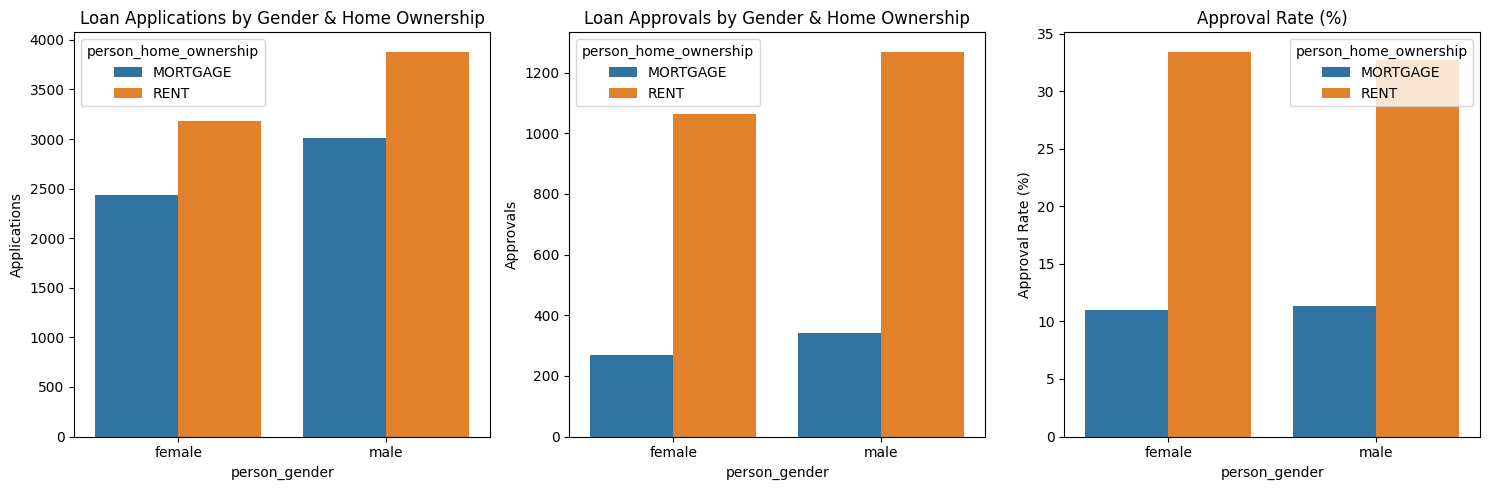

In [51]:
# Filter for Bachelor's degree students
df_bachelor = loan_df[loan_df['person_education'] == 'Bachelor']

# Further filter for RENT or MORTGAGE home ownership
df_filtered = df_bachelor[df_bachelor['person_home_ownership'].isin(['RENT', 'MORTGAGE'])]

# Group by Gender and Home Ownership
grouped = df_filtered.groupby(['person_gender', 'person_home_ownership'])

# Calculate stats
summary_df = grouped.agg(
    Applications=('loan_status', 'count'),
    Approvals=('loan_status', 'sum')
).reset_index()

# Approval Rate
summary_df['Approval Rate (%)'] = (summary_df['Approvals'] / summary_df['Applications'] * 100).round(2)

# Plot
plt.figure(figsize=(15, 5))

# Applications
plt.subplot(1, 3, 1)
sns.barplot(data=summary_df, x='person_gender', y='Applications', hue='person_home_ownership')
plt.title('Loan Applications by Gender & Home Ownership')

# Approvals
plt.subplot(1, 3, 2)
sns.barplot(data=summary_df, x='person_gender', y='Approvals', hue='person_home_ownership')
plt.title('Loan Approvals by Gender & Home Ownership')

# Approval Rate
plt.subplot(1, 3, 3)
sns.barplot(data=summary_df, x='person_gender', y='Approval Rate (%)', hue='person_home_ownership')
plt.title('Approval Rate (%)')

plt.tight_layout()
plt.show()

In [52]:
loan_df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

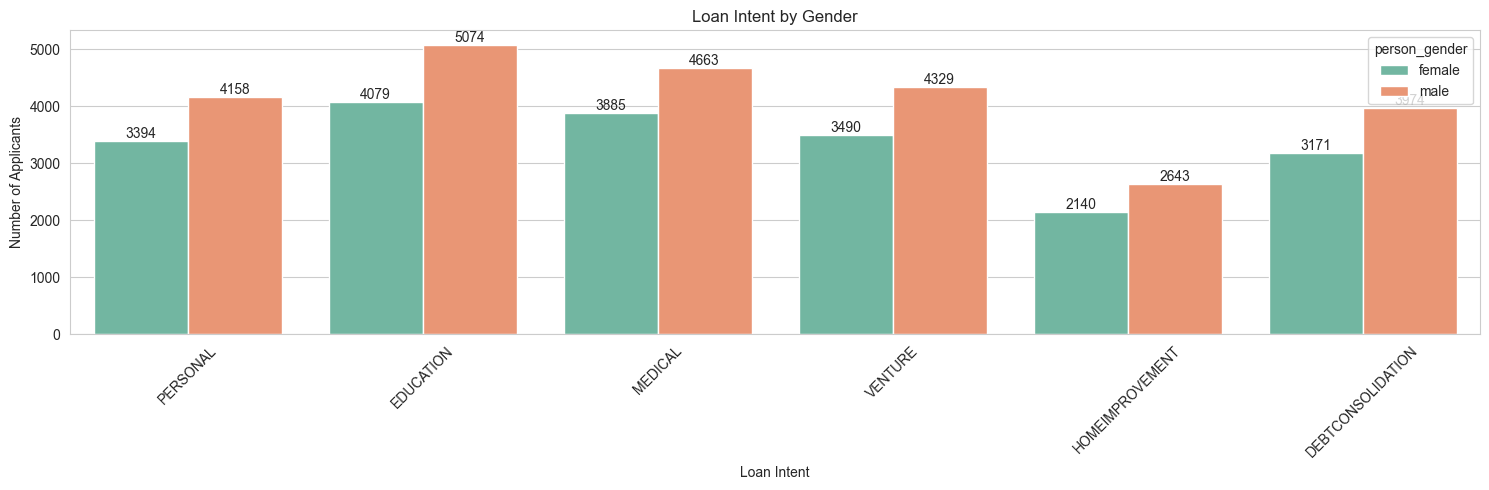

In [57]:
#Set the plot size and style
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

# Create grouped count plot
data = sns.countplot(x='loan_intent', hue='person_gender', data=loan_df, palette='Set2')

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Loan Intent by Gender')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Applicants')

# Add value labels on top of bars
for container in data.containers:
    data.bar_label(container)

plt.tight_layout()
plt.show()

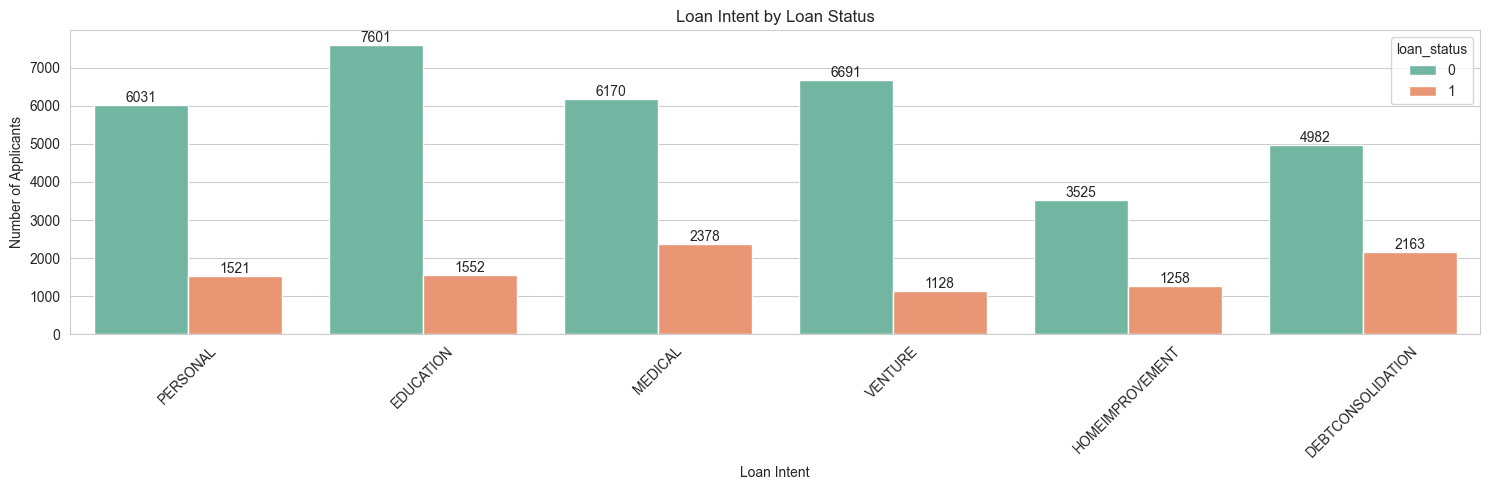

In [63]:
#Set the plot size and style
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

# Create grouped count plot
data = sns.countplot(x='loan_intent', hue='loan_status', data=loan_df, palette='Set2')

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Loan Intent by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Applicants')

# Add value labels on top of bars
for container in data.containers:
    data.bar_label(container)

plt.tight_layout()
plt.show()

In [59]:
loan_df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

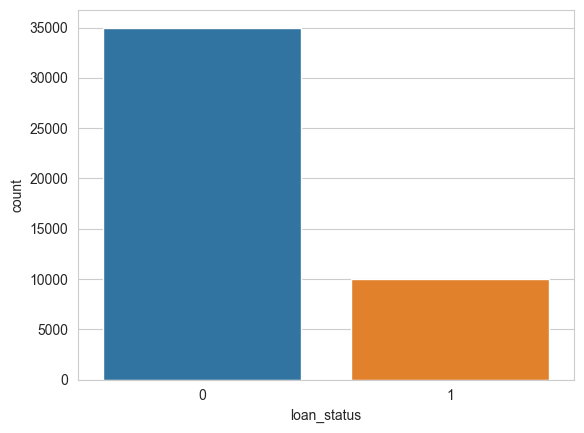

In [62]:
sns.countplot(x=loan_df['loan_status'])  # Imbalance

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='person_age', ylabel='loan_amnt'>

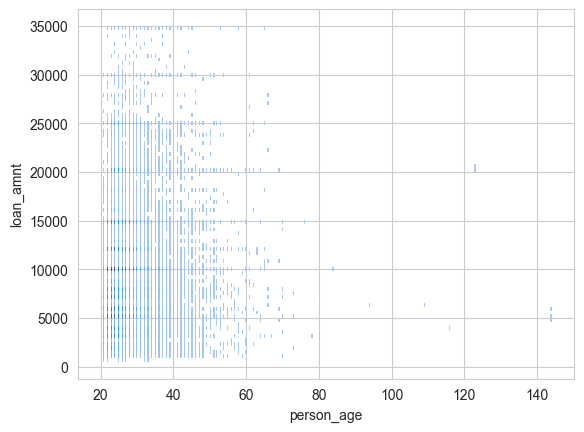

In [65]:
sns.histplot(x='person_age',y='loan_amnt',data=loan_df)

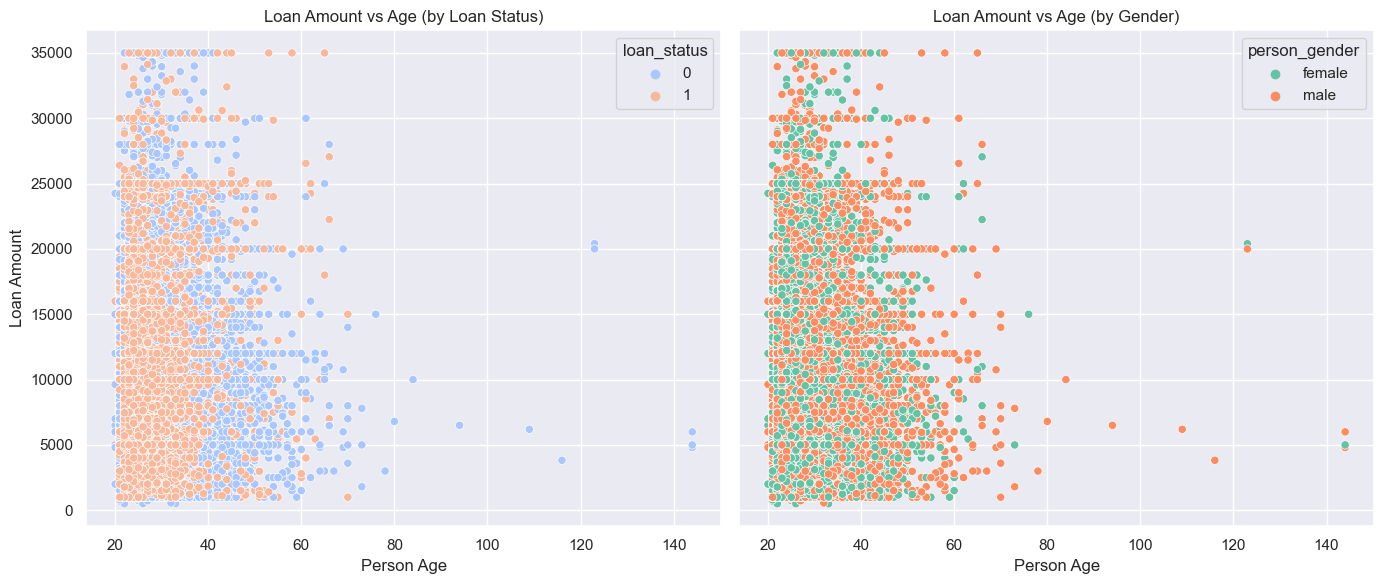

In [89]:
# sns.scatterplot(x='person_age',y='loan_amnt',hue='loan_status',data=loan_df)
# sns.scatterplot(x='person_age',y='loan_amnt',hue='person_gender',data=loan_df)

# Set the theme
sns.set(style="darkgrid")  # white, dark, whitegrid, darkgrid

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot 1: Scatter by Loan Status
sns.scatterplot(x='person_age', y='loan_amnt', hue='loan_status', data=loan_df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Loan Amount vs Age (by Loan Status)')
axes[0].set_xlabel('Person Age')
axes[0].set_ylabel('Loan Amount')

# Plot 2: Scatter by Gender
sns.scatterplot(x='person_age', y='loan_amnt', hue='person_gender', data=loan_df, ax=axes[1], palette='Set2')
axes[1].set_title('Loan Amount vs Age (by Gender)')
axes[1].set_xlabel('Person Age')
axes[1].set_ylabel('')

# Improve spacing
plt.tight_layout()
plt.show()

<Axes: xlabel='person_education', ylabel='loan_amnt'>

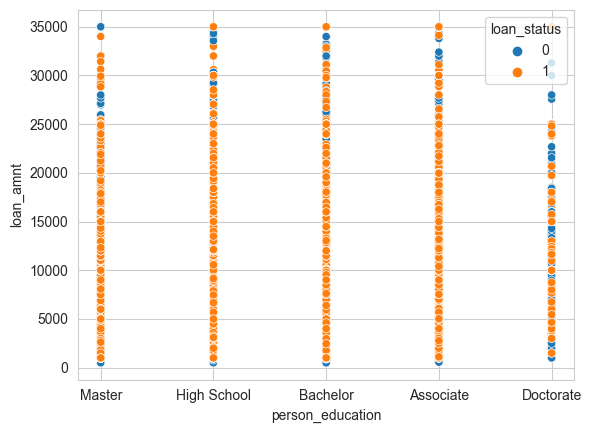

In [74]:
sns.scatterplot(x='person_education',y='loan_amnt',hue='loan_status',data=loan_df)

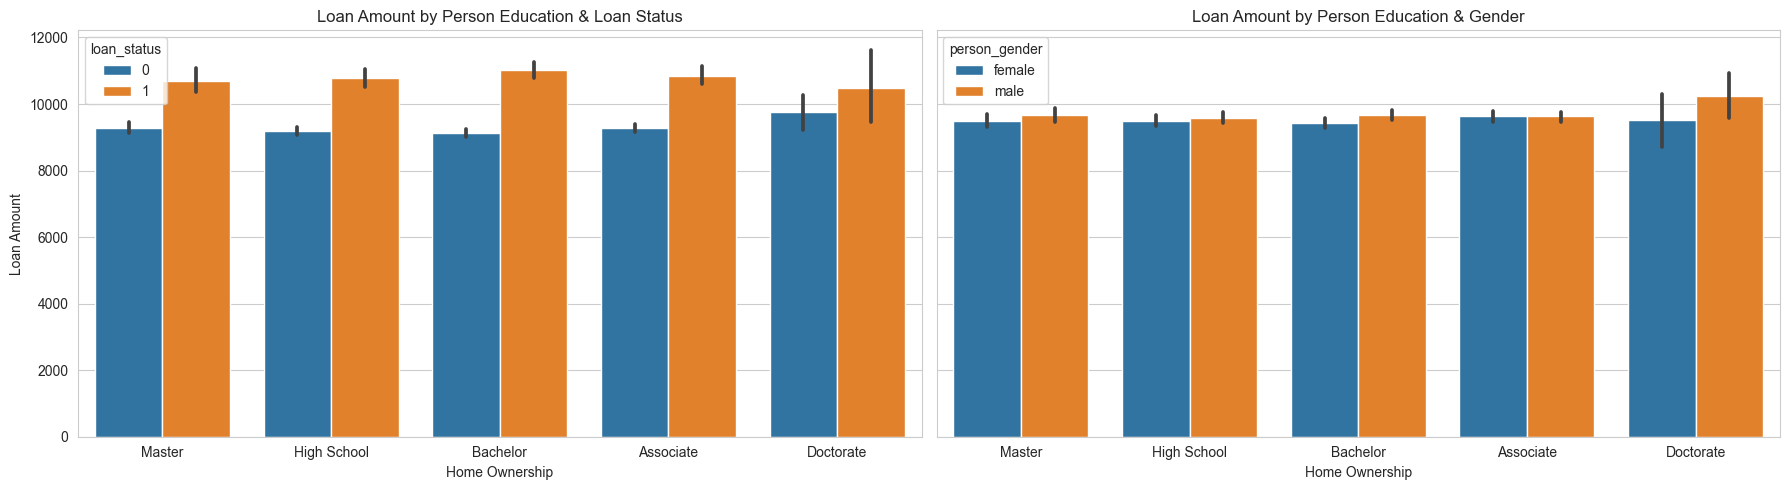

In [84]:
# sns.barplot(x='person_education',y='loan_amnt',hue='loan_status',data=loan_df)
# sns.barplot(x='person_education',y='loan_amnt',hue='person_gender',data=loan_df)
# sns.barplot(x='person_education',y='loan_amnt',hue='person_age',data=loan_df)

# Create a figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot 1: Person Education vs Loan Amount by Loan Status
sns.barplot(x='person_education', y='loan_amnt', hue='loan_status', data=loan_df, ax=axes[0])
axes[0].set_title('Loan Amount by Person Education & Loan Status')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Loan Amount')

# Plot 2: Person Education vs Loan Amount by Gender
sns.barplot(x='person_education', y='loan_amnt', hue='person_gender', data=loan_df, ax=axes[1])
axes[1].set_title('Loan Amount by Person Education & Gender')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('')

# Plot 3: Person Education vs Loan Amount by Age Group (optional: you might bin ages for clarity)
# sns.barplot(x='person_education', y='loan_amnt', hue='person_age', data=loan_df, ax=axes[2])
# axes[2].set_title('Loan Amount by Person Education & Age')
# axes[2].set_xlabel('Home Ownership')
# axes[2].set_ylabel('')

# Adjust layout and show
plt.tight_layout()
plt.show()

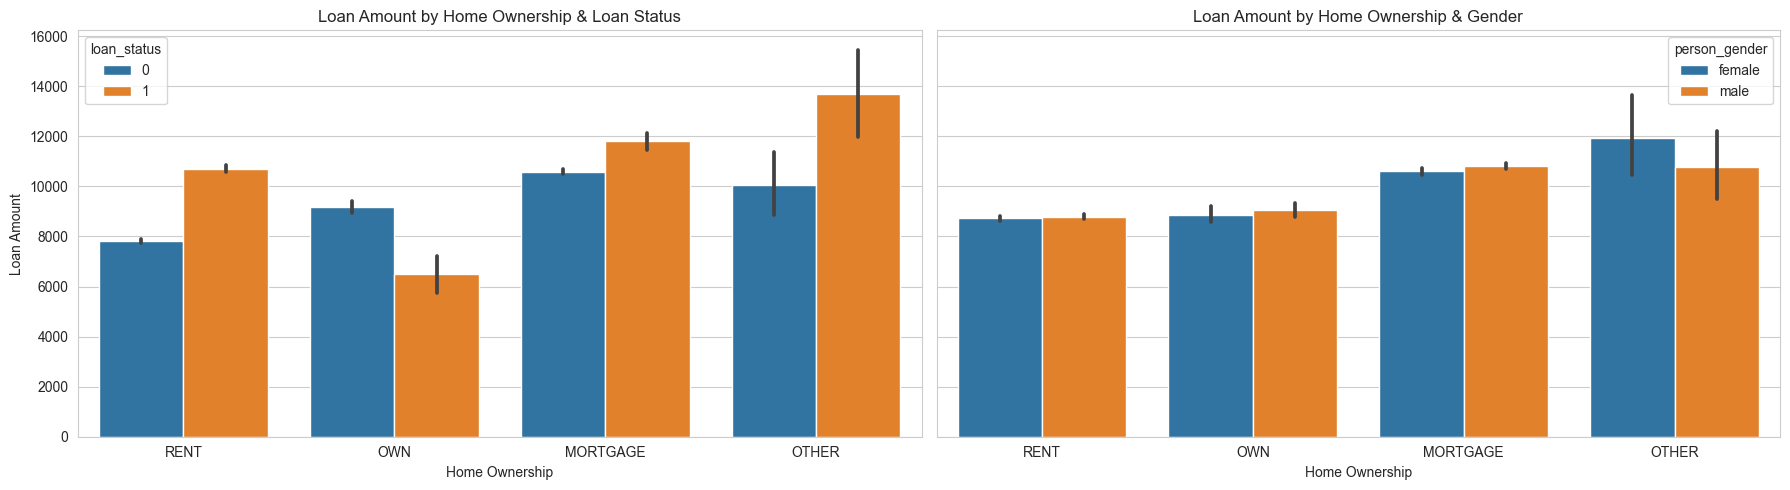

In [80]:
# Create a figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot 1: Home Ownership vs Loan Amount by Loan Status
sns.barplot(x='person_home_ownership', y='loan_amnt', hue='loan_status', data=loan_df, ax=axes[0])
axes[0].set_title('Loan Amount by Home Ownership & Loan Status')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Loan Amount')

# Plot 2: Home Ownership vs Loan Amount by Gender
sns.barplot(x='person_home_ownership', y='loan_amnt', hue='person_gender', data=loan_df, ax=axes[1])
axes[1].set_title('Loan Amount by Home Ownership & Gender')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('')

# Plot 3: Home Ownership vs Loan Amount by Age Group (optional: you might bin ages for clarity)
# sns.barplot(x='person_home_ownership', y='loan_amnt', hue='person_age', data=loan_df, ax=axes[2])
# axes[2].set_title('Loan Amount by Home Ownership & Age')
# axes[2].set_xlabel('Home Ownership')
# axes[2].set_ylabel('')

# Adjust layout and show
plt.tight_layout()
plt.show()

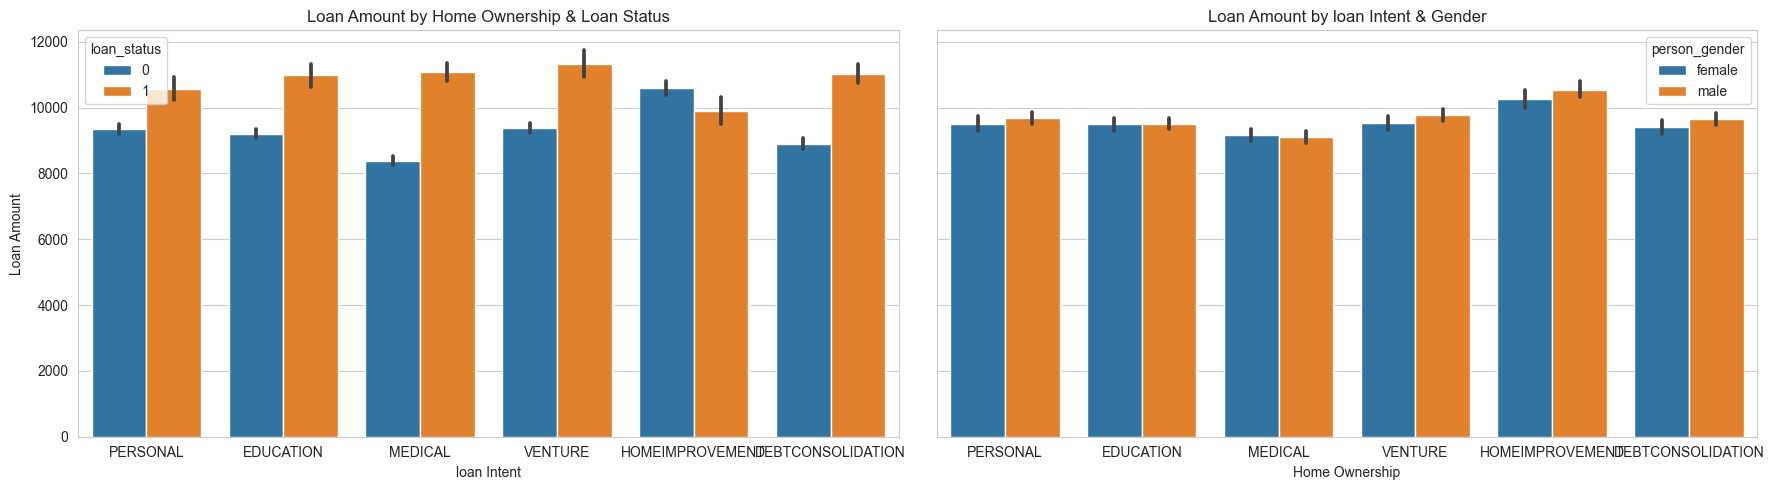

In [81]:

# Create a figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot 1: loan intent vs Loan Amount by Loan Status
sns.barplot(x='loan_intent', y='loan_amnt', hue='loan_status', data=loan_df, ax=axes[0])
axes[0].set_title('Loan Amount by Home Ownership & Loan Status')
axes[0].set_xlabel('loan Intent')
axes[0].set_ylabel('Loan Amount')

# Plot 2: loan Intent vs Loan Amount by Gender
sns.barplot(x='loan_intent', y='loan_amnt', hue='person_gender', data=loan_df, ax=axes[1])
axes[1].set_title('Loan Amount by loan Intent & Gender')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('')

# Plot 3: loan Intent vs Loan Amount by Age Group (optional: you might bin ages for clarity)
# sns.barplot(x='loan_intent', y='loan_amnt', hue='person_age', data=loan_df, ax=axes[2])
# axes[2].set_title('Loan Amount by loan intent & Age')
# axes[2].set_xlabel('Home Ownership')
# axes[2].set_ylabel('')

# Adjust layout and show
plt.tight_layout()
plt.show()

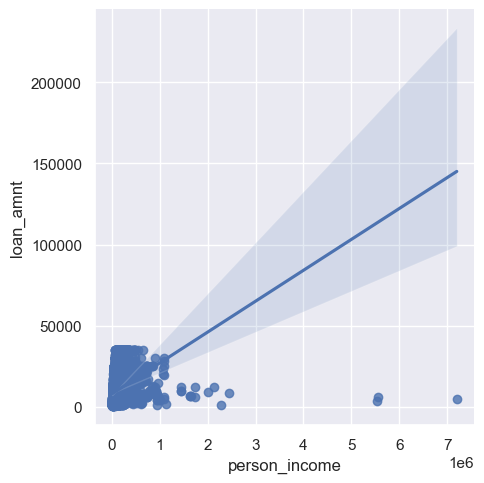

In [113]:
sns.lmplot(x='person_income',y='loan_amnt',data=loan_df)

<Axes: >

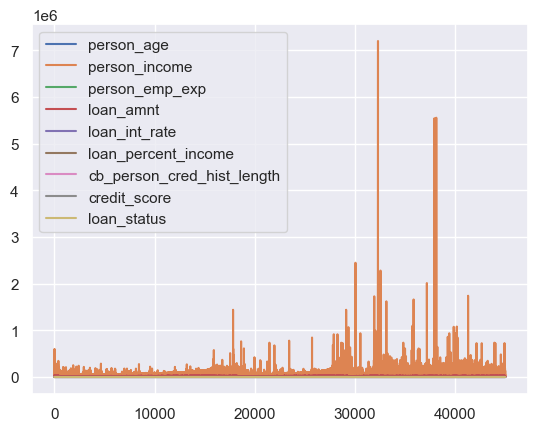

In [154]:
loan_df.plot()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packa

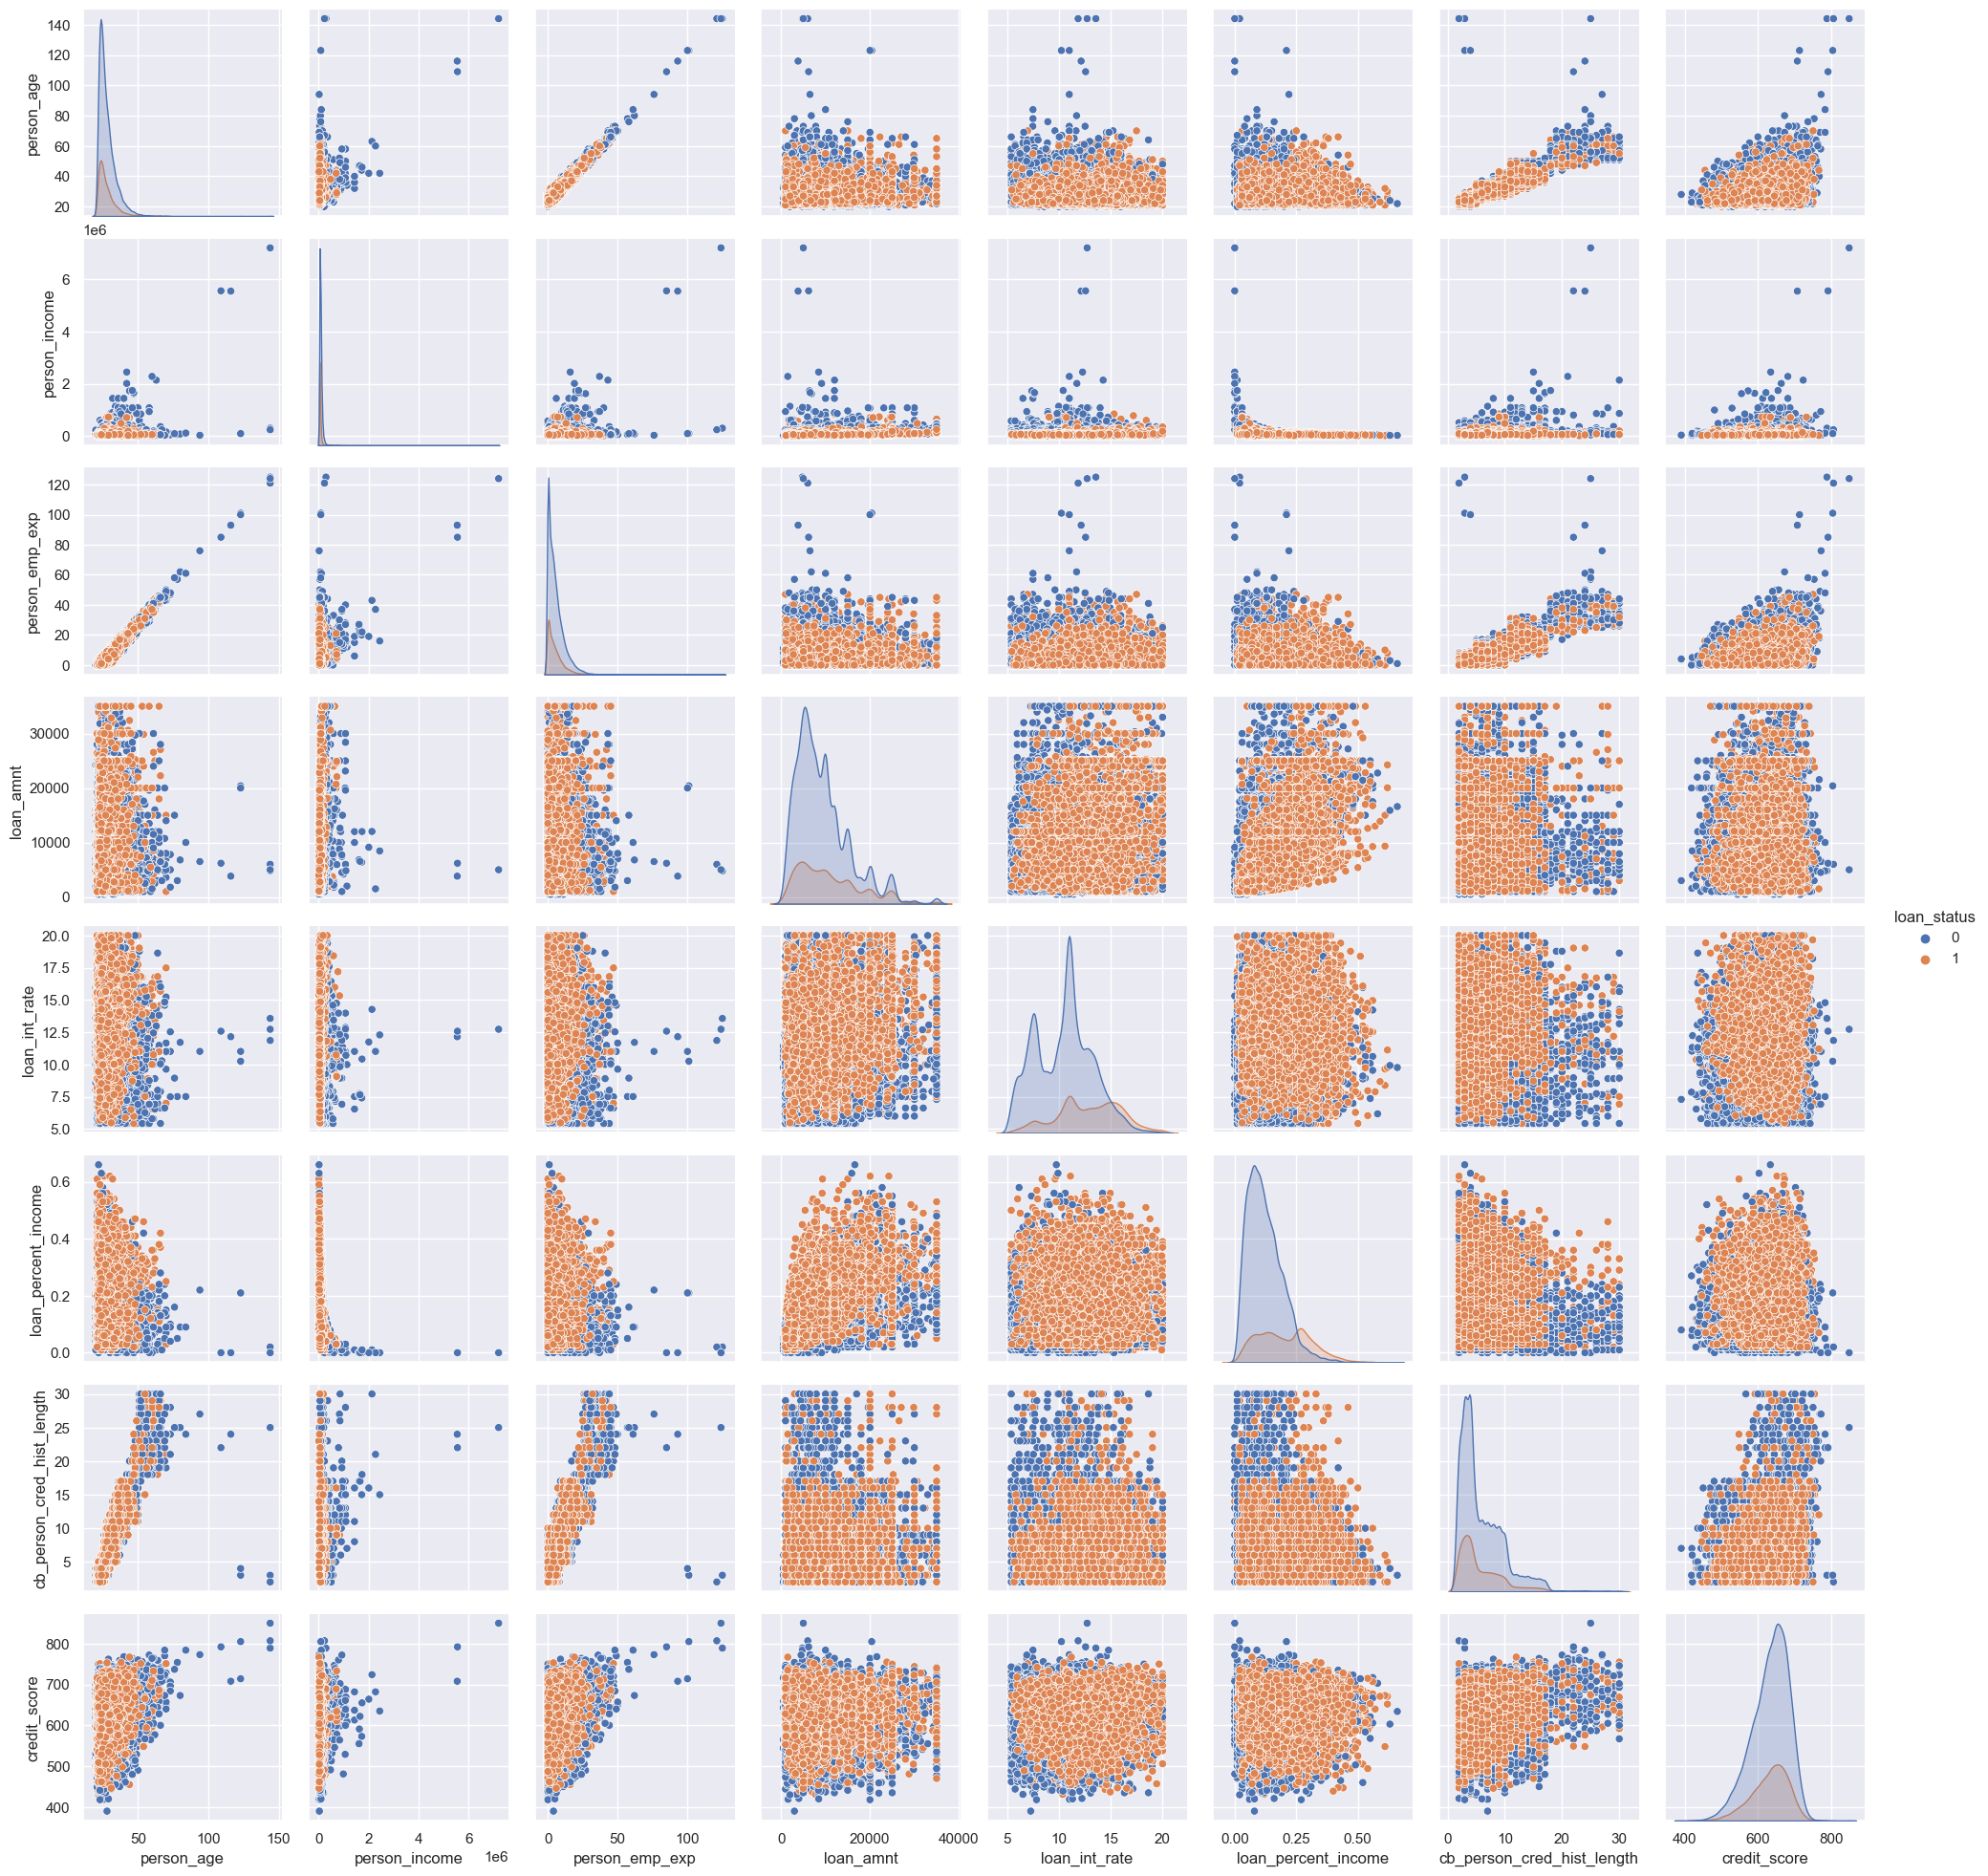

In [159]:
sns.pairplot(loan_df,hue='loan_status')

## Statistics Analaytics:-

In [114]:
loan_df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [149]:
# Split the data into numerical and categorical columns
X_num = loan_df.select_dtypes(include=['float64', 'int64'])  # Numerical features
X_cat = loan_df.select_dtypes('object')  # Categorical features


In [151]:
X_num

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       loan_status  
0                1  
1                0  
2                1  
3                1  
4                1  
...            ...  
44995            1  
44996            1  
44997            1  
44998            1  
44999            1  

[45000 rows x 9 columns]

In [153]:
X_cat

person_gender person_education person_home_ownership        loan_intent  \
0            female           Master                  RENT           PERSONAL   
1            female      High School                   OWN          EDUCATION   
2            female      High School              MORTGAGE            MEDICAL   
3            female         Bachelor                  RENT            MEDICAL   
4              male           Master                  RENT            MEDICAL   
...             ...              ...                   ...                ...   
44995          male        Associate                  RENT            MEDICAL   
44996        female        Associate                  RENT    HOMEIMPROVEMENT   
44997          male        Associate                  RENT  DEBTCONSOLIDATION   
44998          male         Bachelor                  RENT          EDUCATION   
44999          male      High School                  RENT  DEBTCONSOLIDATION   

      previous_loan_defaults_on_file  
0                                 No  
1                                Yes  
2                                 No  
3                                 No  
4                                 No  
...                              ...  
44995                             No  
44996                             No  
44997                             No  
44998                             No  
44999                             No  

[45000 rows x 5 columns]

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='previous_loan_defaults_on_file', ylabel='Count'>

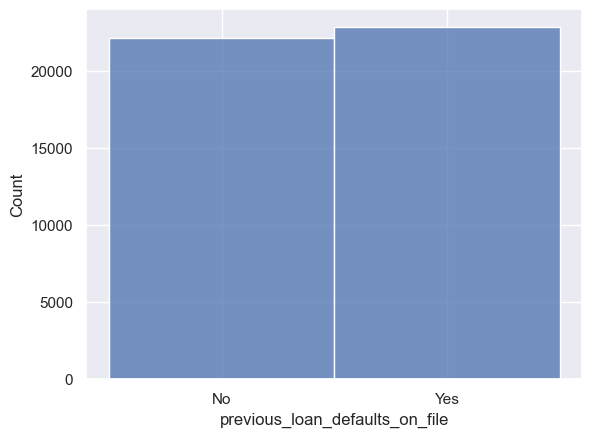

In [169]:
sns.histplot(loan_df['previous_loan_defaults_on_file'])

<Axes: >

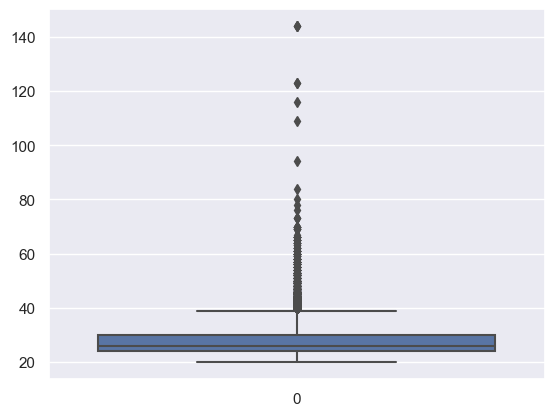

In [115]:
# loan_df['person_age'].value_counts()
sns.boxplot(loan_df['person_age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21876\551519360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['person_age'])
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='person_age', ylabel='Density'>

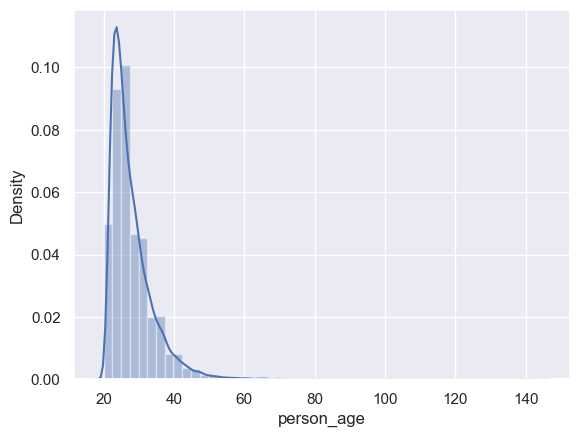

In [116]:
sns.distplot(loan_df['person_age'])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


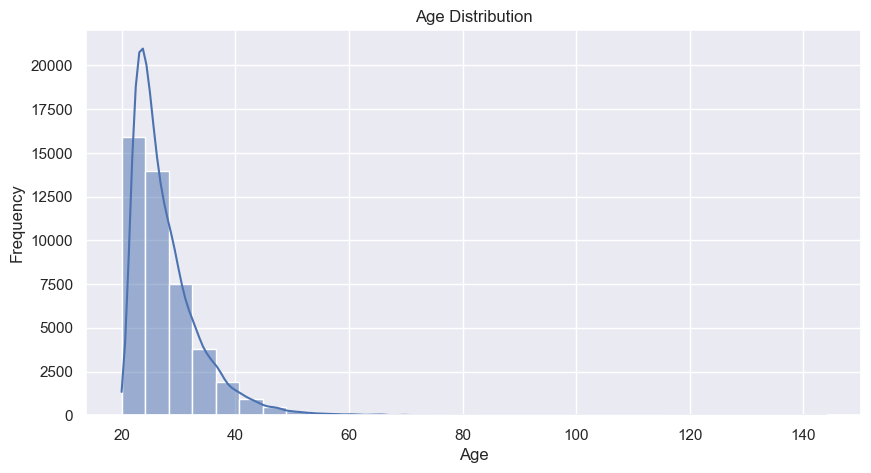

In [145]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(loan_df['person_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

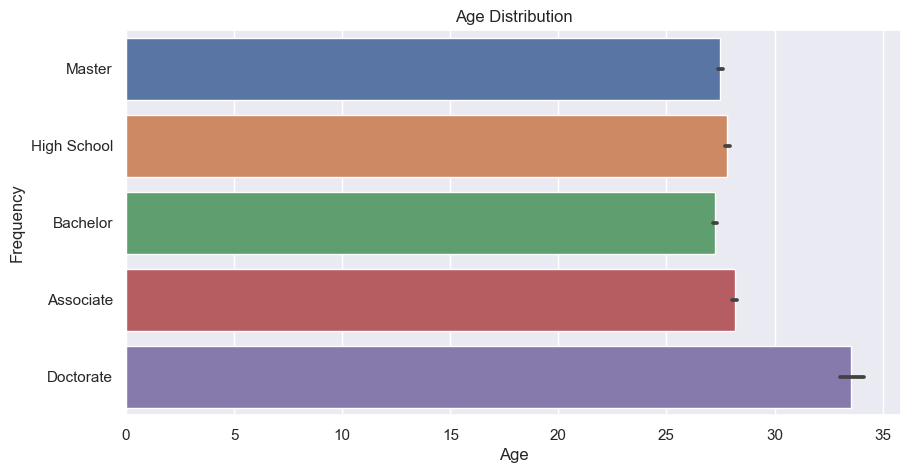

In [163]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_df['person_age'],y=loan_df['person_education'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

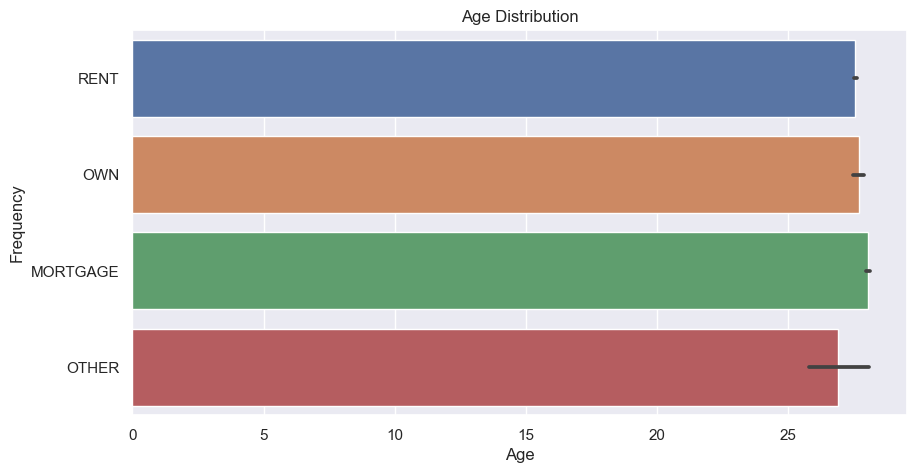

In [164]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_df['person_age'],y=loan_df['person_home_ownership'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

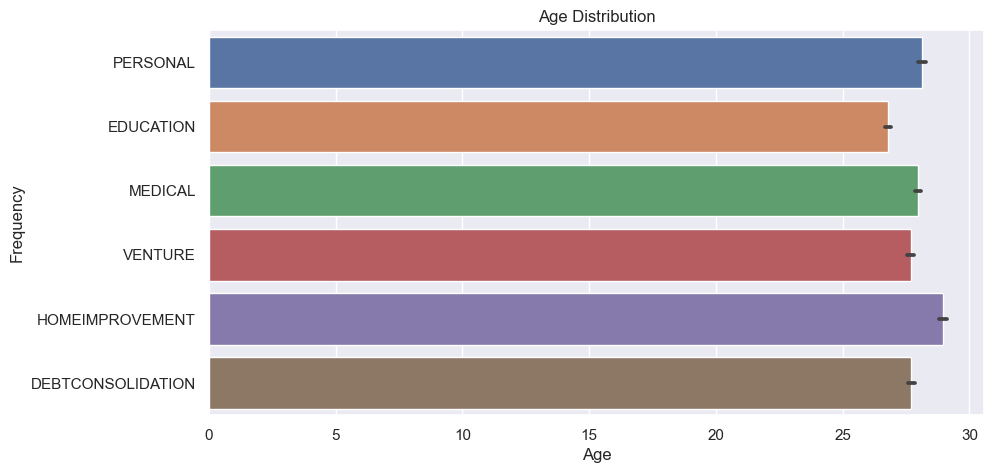

In [165]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_df['person_age'],y=loan_df['loan_intent'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

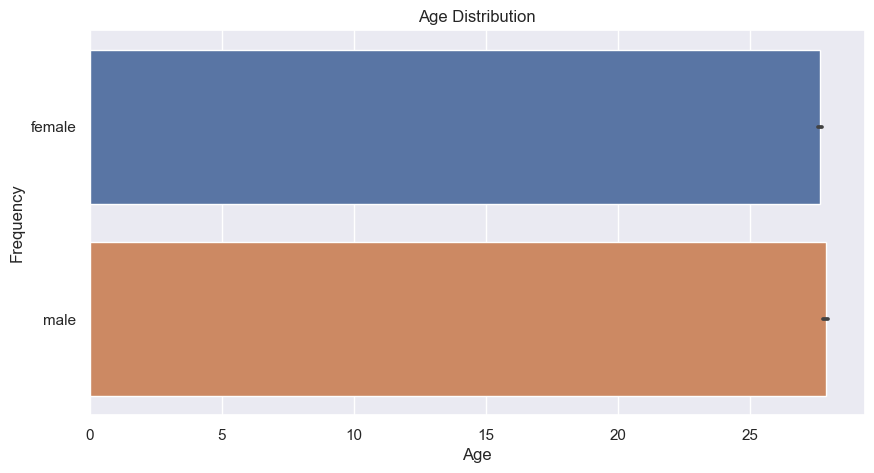

In [166]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_df['person_age'],y=loan_df['person_gender'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Correlation Matrix

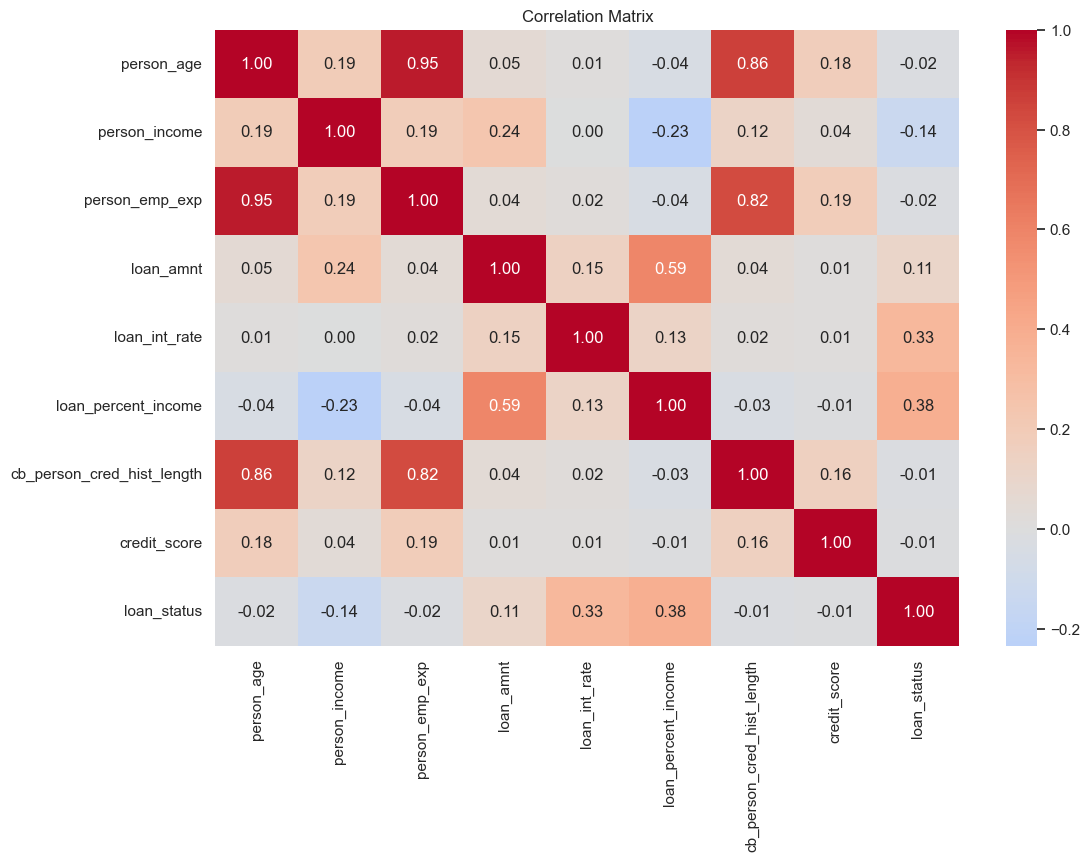

In [146]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = loan_df.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [179]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [185]:
new_df = loan_df.copy()
new_df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [186]:
# Identify object (categorical) columns
cat_cols = new_df.select_dtypes(include='object').columns

# Apply OrdinalEncoder to all object columns at once
encoder = OrdinalEncoder()
new_df[cat_cols] = encoder.fit_transform(new_df[cat_cols])

In [187]:

# for col in new_df.select_dtypes(include='object'):
#     new_df[col] = OrdinalEncoder().fit_transform(new_df[col])
    # new_df[col] = pd.Categorical(new_df[col]).codes
    # new_df[col] = LabelEncoder().fit_transform(new_df[col])

In [190]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  float64
 2   person_education                45000 non-null  float64
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  float64
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  float64
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [191]:
new_df.head(100)

person_age  person_gender  person_education  person_income  \
0         22.0            0.0               4.0        71948.0   
1         21.0            0.0               3.0        12282.0   
2         25.0            0.0               3.0        12438.0   
3         23.0            0.0               1.0        79753.0   
4         24.0            1.0               4.0        66135.0   
..         ...            ...               ...            ...   
95        23.0            1.0               0.0       145092.0   
96        24.0            0.0               1.0        15928.0   
97        22.0            1.0               1.0        73131.0   
98        25.0            1.0               4.0       281501.0   
99        24.0            0.0               0.0       281775.0   

    person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0                0                    3.0    35000.0          4.0   
1                0                    2.0     1000.0          1.0   
2                3                    0.0     5500.0          3.0   
3                0                    3.0    35000.0          3.0   
4                1                    3.0    35000.0          3.0   
..             ...                    ...        ...          ...   
95               0                    3.0    25600.0          1.0   
96               1                    2.0     1600.0          3.0   
97               3                    3.0    25475.0          5.0   
98               4                    0.0    20000.0          3.0   
99               0                    2.0    20000.0          2.0   

    loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0           16.02                 0.49                         3.0   
1           11.14                 0.08                         2.0   
2           12.87                 0.44                         3.0   
3           15.23                 0.44                         2.0   
4           14.27                 0.53                         4.0   
..            ...                  ...                         ...   
95          12.69                 0.18                         3.0   
96          13.57                 0.10                         3.0   
97          10.99                 0.35                         3.0   
98          14.27                 0.07                         4.0   
99           8.88                 0.07                         4.0   

    credit_score  previous_loan_defaults_on_file  loan_status  
0            561                             0.0            1  
1            504                             1.0            0  
2            635                             0.0            1  
3            675                             0.0            1  
4            586                             0.0            1  
..           ...                             ...          ...  
95           557                             1.0            0  
96           689                             1.0            0  
97           681                             0.0            1  
98           623                             1.0            0  
99           595                             1.0            0  

[100 rows x 14 columns]

In [218]:
# Example if monthly payment & term (months) are available
# total_payment = monthly_payment * loan_term_months
# total_interest = total_payment - loan_amnt

# loan_interest_rate = (total_interest / loan_amnt) / (loan_term_months / 12)
loan_interest_rate = (16.02 / 35000) / (48 / 12)
loan_interest_rate

0.00011442857142857142

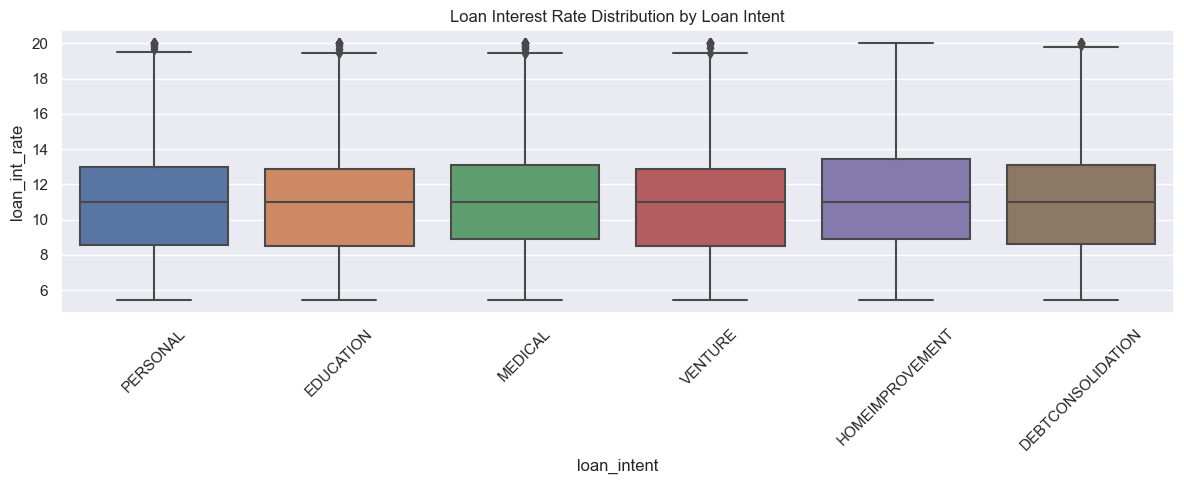

In [213]:
plt.figure(figsize=(12,5))
sns.boxplot(x='loan_intent', y='loan_int_rate', data=loan_df)
plt.title("Loan Interest Rate Distribution by Loan Intent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


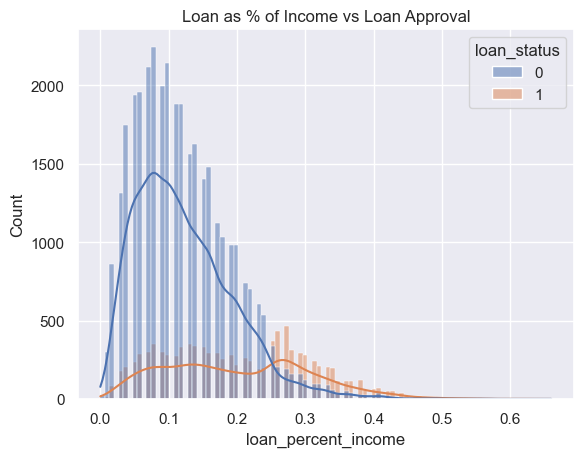

In [214]:
sns.histplot(data=loan_df, x='loan_percent_income', hue='loan_status', kde=True)
plt.title("Loan as % of Income vs Loan Approval")
plt.show()

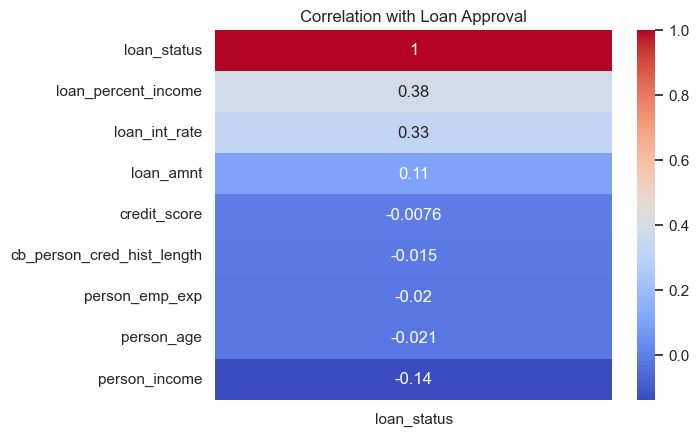

In [215]:
correlation = loan_df.corr(numeric_only=True)
sns.heatmap(correlation[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Loan Approval")
plt.show()

In [216]:
loan_df['loan_to_income_ratio'] = loan_df['loan_amnt'] / loan_df['person_income']


In [217]:
loan_df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  \
0               561                             No            1   
1               504                            Yes            0   
2               635                             No            1   
3               675                             No            1   
4               586                             No            1   
...             ...                            ...          ...   
44995           645                             No            1   
44996           621                             No            1   
44997           668                             No            1   
44998           604                             No            1   
44999           628                             No            1   

       loan_to_income_ratio  
0                  0.486462  
1                  0.081420  
2                  0.442193  
3                  0.438855  
4                  0.529221  
...                     ...  
44995              0.312689  
44996              0.136778  
44997              0.048664  
44998              0.361838  
44999              0.129144  

[45000 rows x 15 columns]

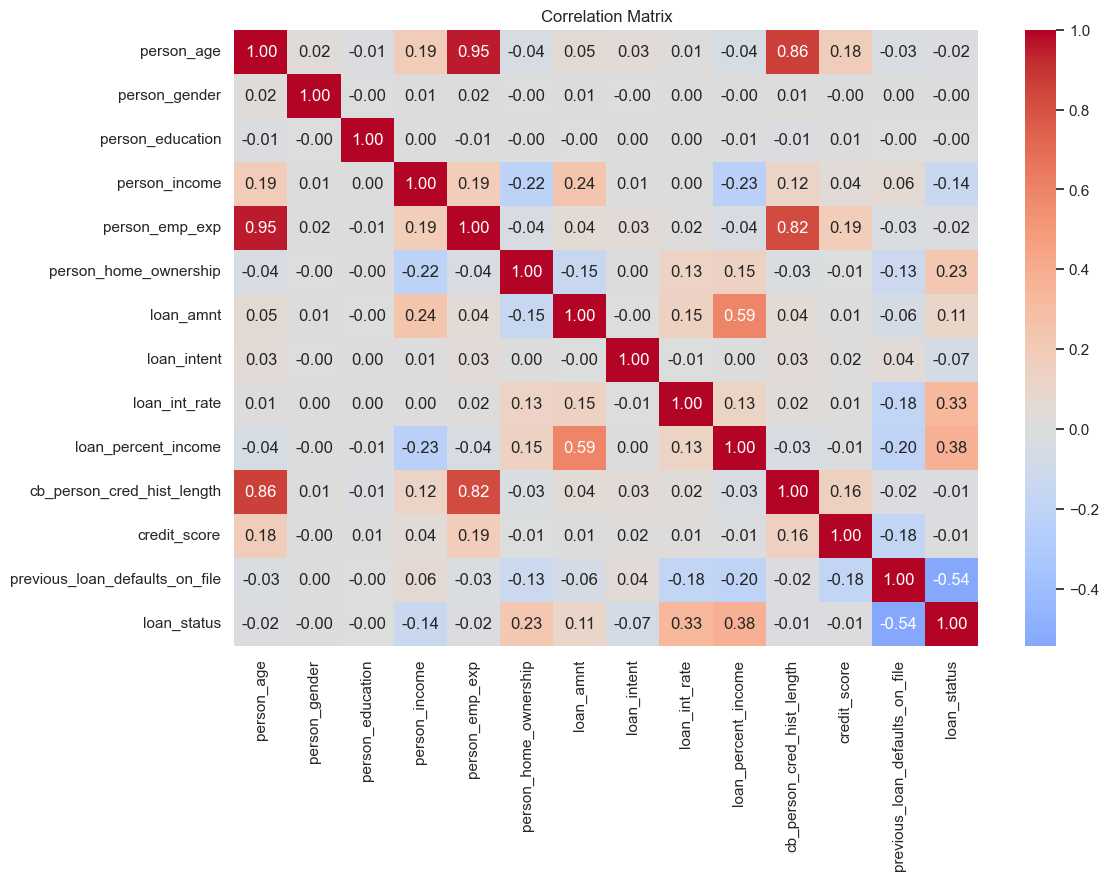

In [192]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = new_df.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

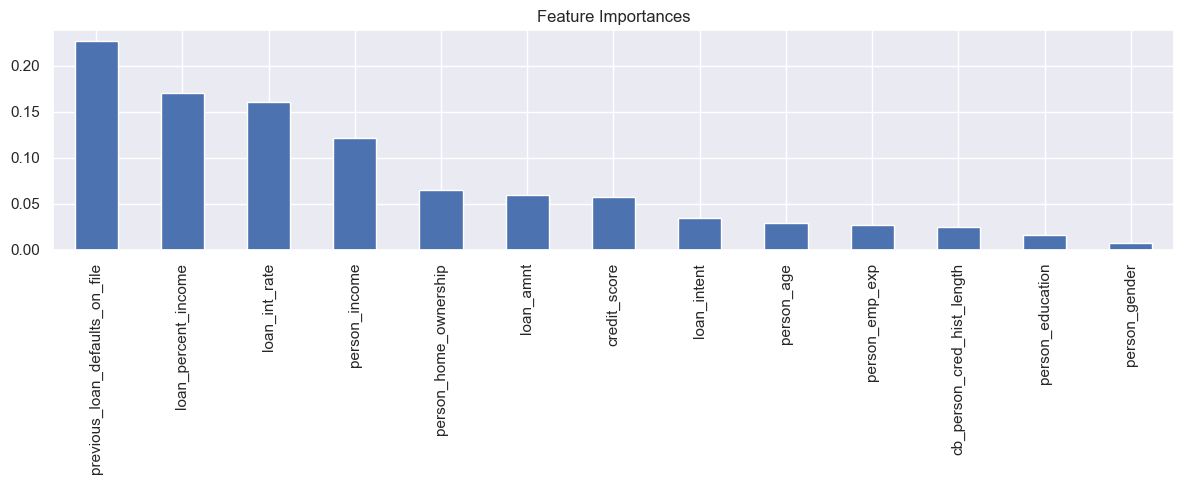

In [91]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = loan_df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), title='Feature Importances')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


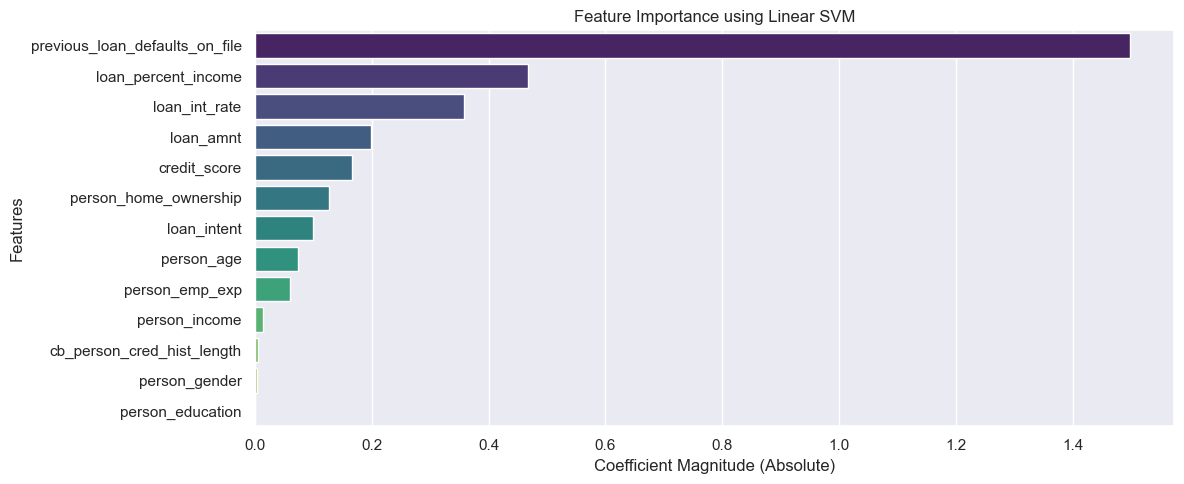

In [170]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Copy your dataframe
df = loan_df.copy()

# Label Encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Define X and y
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Standardize features (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear SVM
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

# Extract feature importance from coefficients
feature_importance = pd.Series(abs(svm_model.coef_[0]), index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance using Linear SVM")
plt.xlabel("Coefficient Magnitude (Absolute)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# 🔝 1. Recursive Feature Elimination (RFE)

In [199]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

# Use LinearSVC for RFE
model = LinearSVC(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=13)  # Choose top 10 features

rfe.fit(X_train, y_train)

# Results
selected_features = X.columns[rfe.support_]
print("Top Features:", list(selected_features))


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Top Features: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [196]:
# Use RandomForest for RFE
rfe = RFE(estimator=rf, n_features_to_select=13)  # Choose top 10 features

rfe.fit(X_train, y_train)

# Results
selected_features = X.columns[rfe.support_]
print("Top Features:", list(selected_features))


Top Features: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


# 📊 2. SelectKBest with Statistical Tests

In [198]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=13)
selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X.columns)
top_features = feature_scores.sort_values(ascending=False).head(13)

print("Top Features:\n", top_features)


Top Features:
 previous_loan_defaults_on_file    14946.537634
loan_percent_income                6463.136289
loan_int_rate                      4462.457719
person_home_ownership              2110.255076
person_income                       620.370968
loan_amnt                           449.508175
loan_intent                         188.424353
person_age                           15.275687
person_emp_exp                       12.507651
cb_person_cred_hist_length            6.671330
credit_score                          1.515456
person_gender                         0.519611
person_education                      0.083964
dtype: float64


# 🧠 3. Feature Importance from Tree-Based Models

In [201]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances.head(13))


Top Features:
 previous_loan_defaults_on_file    0.224702
loan_percent_income               0.167810
loan_int_rate                     0.157525
person_income                     0.125666
person_home_ownership             0.065556
loan_amnt                         0.058548
credit_score                      0.057817
loan_intent                       0.035326
person_age                        0.029360
person_emp_exp                    0.027887
cb_person_cred_hist_length        0.025048
person_education                  0.016845
person_gender                     0.007908
dtype: float64


# 🧪 4. PCA (Principal Component Analysis) for Dimensionality Reduction

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)  # reduce to top 5 components
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.22144824 0.13435828 0.1078608  0.08331337 0.07772534 0.0767612
 0.07598503 0.07412126 0.0567887  0.05568077 0.01811532 0.01460367
 0.00323801]


In [203]:
# Create a DataFrame for PCA components (aka loadings)
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Show how much each original feature contributes to each PC
print(pca_components.T)


                                     PC1       PC2       PC3       PC4  \
person_age                      0.571300  0.006902 -0.057704 -0.102212   
person_gender                   0.014563 -0.006769  0.020193 -0.011259   
person_education               -0.010968  0.005109 -0.003254  0.178295   
person_income                   0.171684  0.106601  0.525549  0.361262   
person_emp_exp                  0.563895  0.005073 -0.063796 -0.093826   
person_home_ownership          -0.056452 -0.170510 -0.566545 -0.191193   
loan_amnt                       0.058651 -0.540592  0.504243 -0.067954   
loan_intent                     0.029321  0.018413  0.015334 -0.212999   
loan_int_rate                   0.016096 -0.332572 -0.126290  0.225193   
loan_percent_income            -0.038407 -0.649423  0.062263 -0.291498   
cb_person_cred_hist_length      0.538240 -0.000173 -0.083614 -0.135449   
credit_score                    0.161610 -0.079488 -0.159981  0.590813   
previous_loan_defaults_on_file -0.0281

In [204]:
# Get the loading matrix (components)
components_df = pd.DataFrame(
    pca.components_, 
    columns=X.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Show top contributing features for each principal component
print(components_df.T.abs().sort_values(by='PC1', ascending=False).head())


                                 PC1       PC2       PC3       PC4       PC5  \
person_age                  0.571300  0.006902  0.057704  0.102212  0.016024   
person_emp_exp              0.563895  0.005073  0.063796  0.093826  0.012088   
cb_person_cred_hist_length  0.538240  0.000173  0.083614  0.135449  0.012754   
person_income               0.171684  0.106601  0.525549  0.361262  0.052467   
credit_score                0.161610  0.079488  0.159981  0.590813  0.171172   

                                 PC6       PC7       PC8       PC9      PC10  \
person_age                  0.004490  0.048768  0.012914  0.031716  0.021643   
person_emp_exp              0.005361  0.047837  0.009372  0.029689  0.014749   
cb_person_cred_hist_length  0.008678  0.057528  0.002173  0.078362  0.006805   
person_income               0.004397  0.090830  0.319146  0.448334  0.332514   
credit_score                0.014509  0.214993  0.453142  0.297073  0.471841   

                                PC11  

## Remove Unnecessary Feature:- 

In [205]:
new_df.drop(['previous_loan_defaults_on_file'],inplace=True,axis=1)
#new_df.drop(['credit_score'],inplace=True,axis=1)
new_df.drop(['cb_person_cred_hist_length'],inplace=True,axis=1)
new_df.drop(['loan_int_rate'],inplace=True,axis=1)
new_df.drop(['loan_percent_income'],inplace=True,axis=1)

In [206]:
new_df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0            0.0               4.0        71948.0               0   
1        21.0            0.0               3.0        12282.0               0   
2        25.0            0.0               3.0        12438.0               3   
3        23.0            0.0               1.0        79753.0               0   
4        24.0            1.0               4.0        66135.0               1   

   person_home_ownership  loan_amnt  loan_intent  credit_score  loan_status  
0                    3.0    35000.0          4.0           561            1  
1                    2.0     1000.0          1.0           504            0  
2                    0.0     5500.0          3.0           635            1  
3                    3.0    35000.0          3.0           675            1  
4                    3.0    35000.0          3.0           586            1

<Axes: >

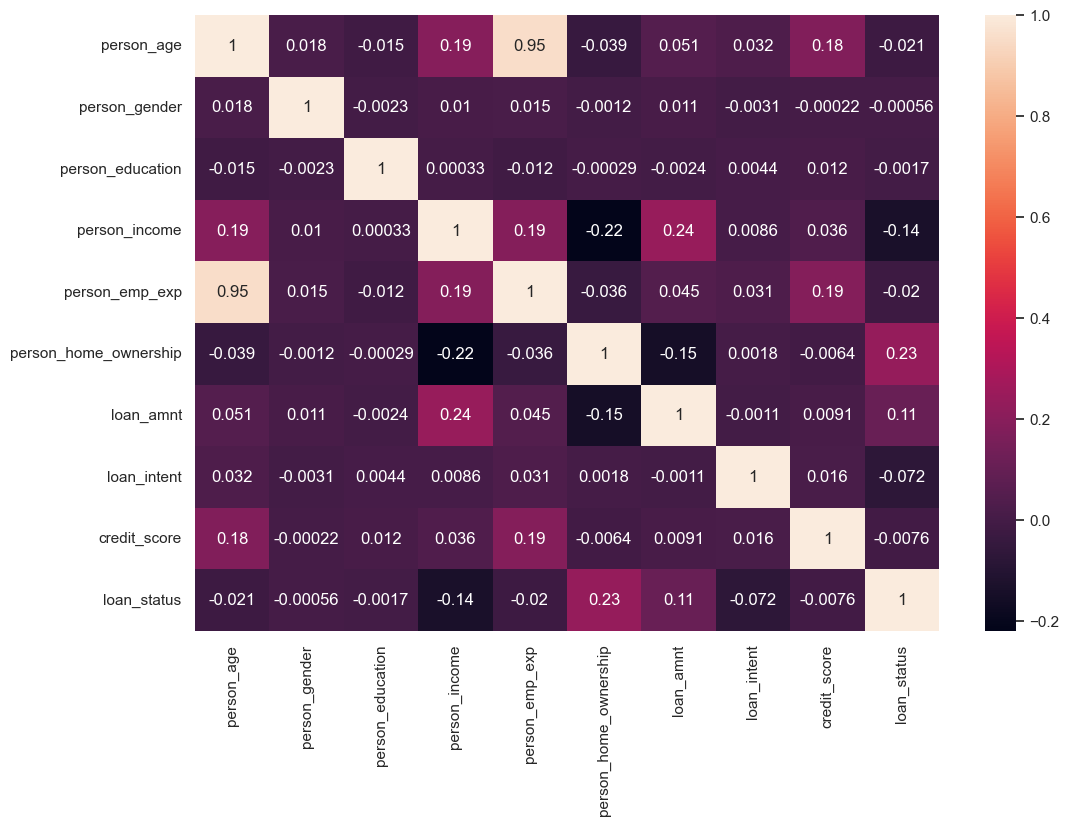

In [210]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(),annot=True)

In [211]:
# Define X and y
X = new_df.drop('loan_status', axis=1)
y = new_df['loan_status']

# Standardize features (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [212]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances.head(10))

Top Features:
 person_income            0.336183
loan_amnt                0.216718
credit_score             0.123774
person_home_ownership    0.074545
person_age               0.072685
person_emp_exp           0.064533
loan_intent              0.055619
person_education         0.037651
person_gender            0.018292
dtype: float64


In [ ]:
# person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_status